In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Importing the Data**

In [296]:
data=pd.read_csv('C:/Users/tanishq bhardwaj/OneDrive/Desktop/DHV Project/IPL Dataset.csv')

In [297]:
data.head()

match_id  season  start_date                  venue  innings  ball  \
0    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.1   
1    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.2   
2    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.3   
3    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.4   
4    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.5   

            batting_team                 bowling_team      striker  \
0  Kolkata Knight Riders  Royal Challengers Bangalore   SC Ganguly   
1  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
2  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
3  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
4  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   

   non_striker  ... runs_off_bat  extras  wides  noballs  byes  legbyes  \
0  BB McCullum  ...            0       1    0.0      0.0   0.0      1.0   
1   SC Ganguly  ...            0       0    0.0      0.0   0.0      0.0   
2   SC Ganguly  ...            0       1    1.0      0.0   0.0      0.0   
3   SC Ganguly  ...            0       0    0.0      0.0   0.0      0.0   
4   SC Ganguly  ...            0       0    0.0      0.0   0.0      0.0   

   wicket_type player_dismissed run  over  
0                                 1     0  
1                                 0     0  
2                                 1     0  
3                                 0     0  
4                                 0     0  

[5 rows x 21 columns]

In [298]:
data.shape

(194354, 21)

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

# No null values in the dataset**

In [300]:
data.isnull().sum()

match_id            0
season              0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
wicket_type         0
player_dismissed    0
run                 0
over                0
dtype: int64

# Finding duplicates

In [301]:

duplicate_rows = data.duplicated(keep=False)
duplicate_df = data[duplicate_rows]
duplicate_df.head()



match_id  season  start_date              venue  innings  ball  \
38519    419152    2010  2010-04-13  Brabourne Stadium        1   3.1   
38528    419152    2010  2010-04-13  Brabourne Stadium        1   3.1   

         batting_team      bowling_team       striker non_striker  ...  \
38519  Mumbai Indians  Delhi Daredevils  SR Tendulkar     C Madan  ...   
38528  Mumbai Indians  Delhi Daredevils  SR Tendulkar     C Madan  ...   

      runs_off_bat  extras  wides  noballs  byes  legbyes  wicket_type  \
38519            1       0    0.0      0.0   0.0      0.0                
38528            1       0    0.0      0.0   0.0      0.0                

      player_dismissed run  over  
38519                    1     3  
38528                    1     3  

[2 rows x 21 columns]

In [302]:
data = data.drop_duplicates(keep='first')

In [303]:
data['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021], dtype=int64)

# First Ball of the season**

In [304]:
data.iloc[0]

match_id                                 335982
season                                     2008
start_date                           2008-04-18
venue                     M.Chinnaswamy Stadium
innings                                       1
ball                                        0.1
batting_team              Kolkata Knight Riders
bowling_team        Royal Challengers Bangalore
striker                              SC Ganguly
non_striker                         BB McCullum
bowler                                  P Kumar
runs_off_bat                                  0
extras                                        1
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     1.0
wicket_type                                    
player_dismissed                               
run                                           1
over                                    

# Total matches played by an ipl team**

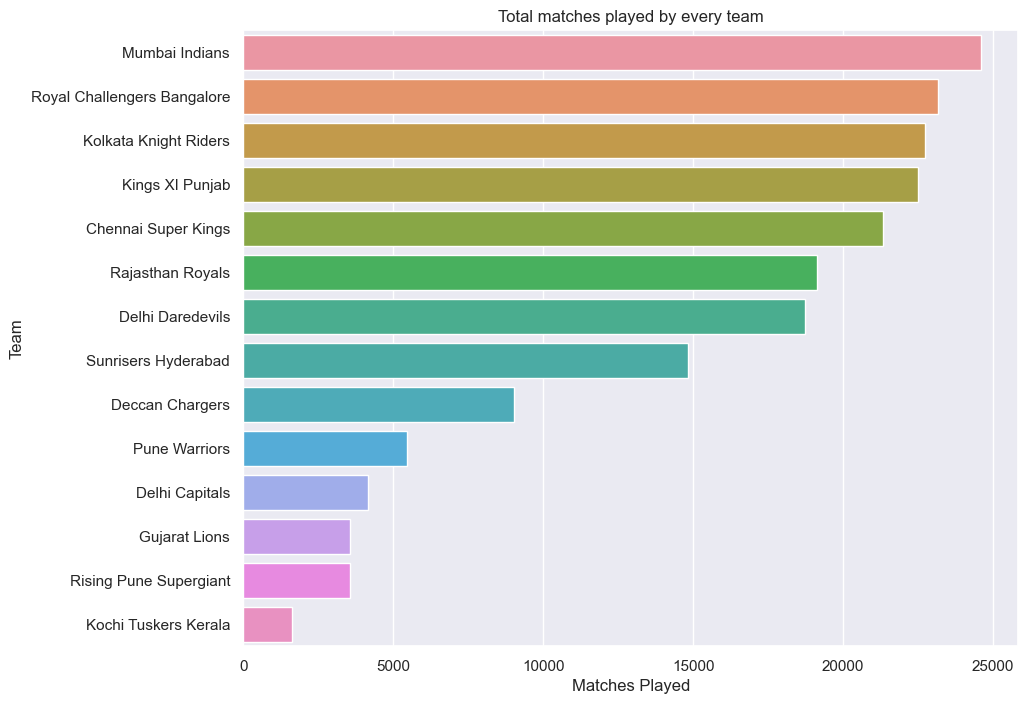

In [305]:
import seaborn as sns
plt.figure(figsize=(10,8))
df = data['bowling_team'].value_counts().sort_values(ascending=False)
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Total matches played by every team')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

# Total matches held in an Ipl season**

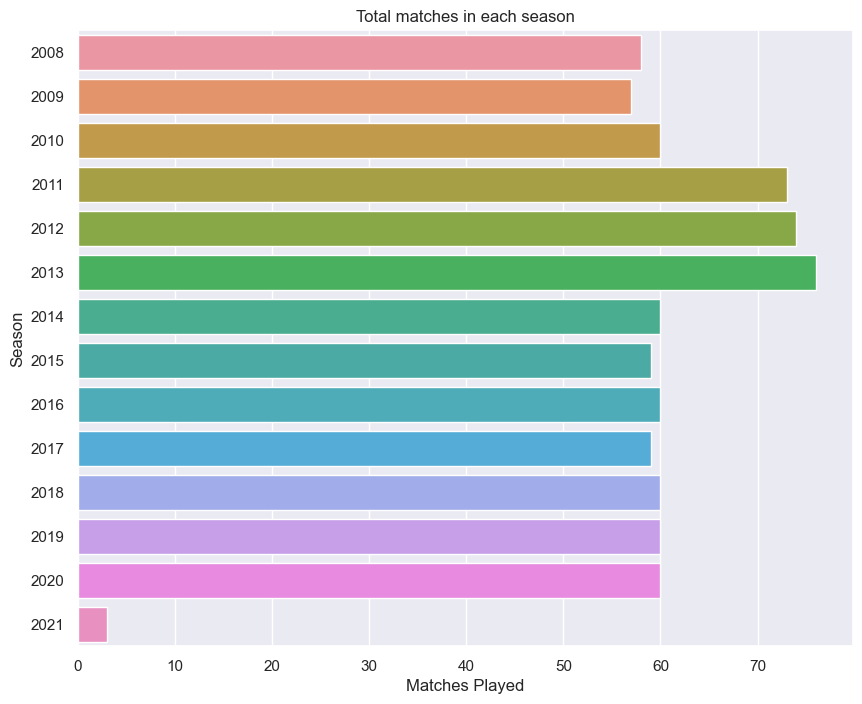

In [306]:
import seaborn as sns
plt.figure(figsize=(10,8))
df = data.groupby(['match_id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Total matches in each season')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

# Total matches played in each venue**

In [307]:
data.groupby(['venue','match_id']).count().droplevel(level=1).index.value_counts()

venue
M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Arun Jaitley Stadium                                    74
Wankhede Stadium, Mumbai                                74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     13
SuperSport Park                                   

#  Maximum runs scored by an ipl team**


In [308]:
d2=data.groupby(['batting_team','match_id','bowling_team','season'])['run'].sum().sort_values(ascending=False)
d2

batting_team                 match_id  bowling_team                 season
Royal Challengers Bangalore  598027    Pune Warriors                2013      263
                             980987    Gujarat Lions                2016      248
Chennai Super Kings          419137    Rajasthan Royals             2010      246
Kolkata Knight Riders        1136604   Kings XI Punjab              2018      245
Chennai Super Kings          335983    Kings XI Punjab              2008      240
                                                                             ... 
Royal Challengers Bangalore  1082617   Kolkata Knight Riders        2017       49
Kolkata Knight Riders        1082648   Sunrisers Hyderabad          2017       48
Sunrisers Hyderabad          733993    Delhi Daredevils             2014       44
Rajasthan Royals             1178424   Royal Challengers Bangalore  2019       41
Royal Challengers Bangalore  829813    Delhi Daredevils             2015        2
Name: run, Length: 1636

# Pie chart for contribution of players  in scoring the maximum run 

striker
CH Gayle          175
TM Dilshan         33
AB de Villiers     31
V Kohli            11
SS Tiwary           2
R Rampaul           0
Name: runs_off_bat, dtype: int64


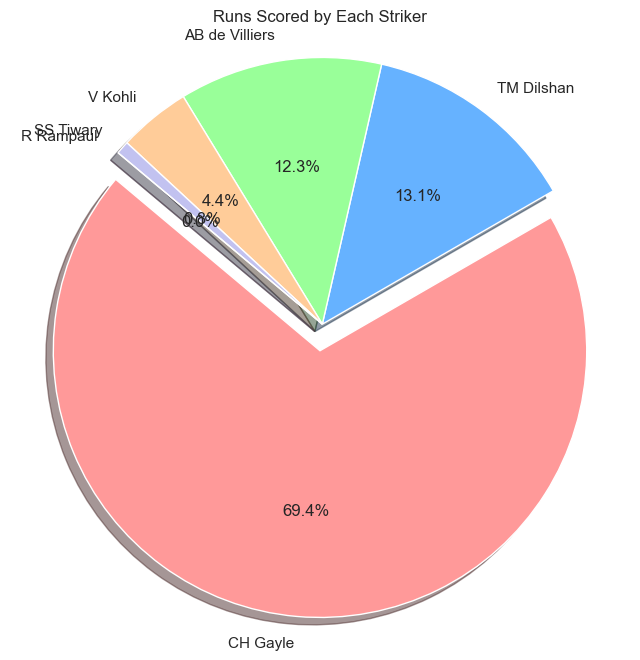

<Figure size 200x200 with 0 Axes>

In [309]:
d1 = data[(data['match_id'] == 598027) & (data['batting_team'] == 'Royal Challengers Bangalore')]
d2=d1.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)
print(d2)
import matplotlib.pyplot as plt
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6']
explode = (0.1, 0, 0, 0, 0, 0)
plt.figure(figsize=(8, 8))  
plt.pie(d2, labels=d2.index, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
plt.title("Runs Scored by Each Striker")
plt.axis('equal')
plt.figure(figsize=(2, 2))
plt.show()



# Top 10 Highest Run Scorers in IPL**

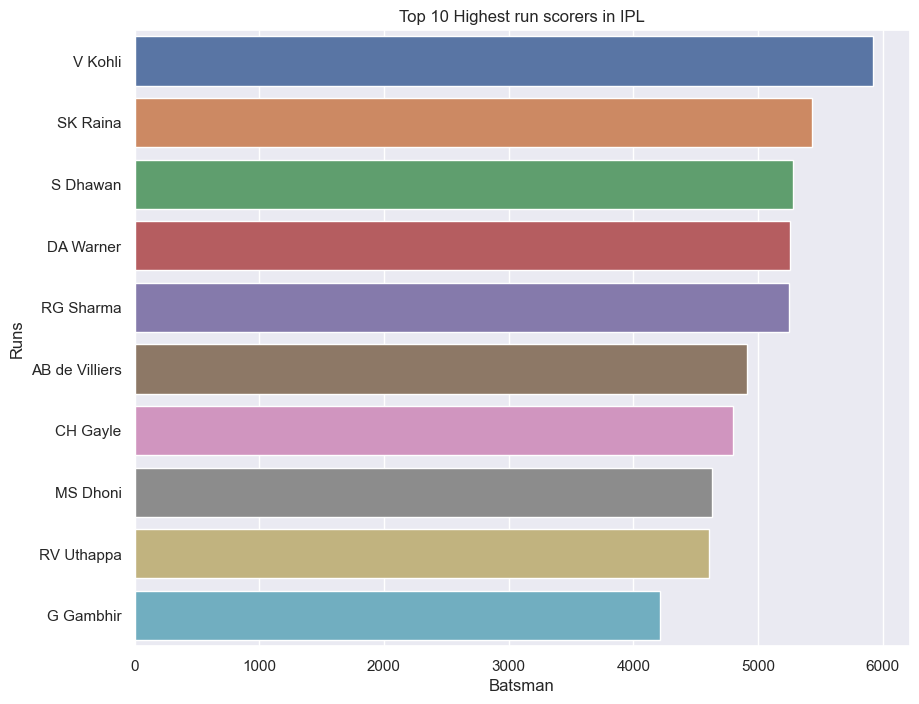

In [310]:
plt.figure(figsize=(10,8))
df = data.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Top 10 Highest run scorers in IPL')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

# Batting average of every team**

In [311]:
data[data['over']<6].groupby(['match_id','batting_team']).sum()['run'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Delhi Capitals                 48.176471
Sunrisers Hyderabad            47.856000
Rising Pune Supergiant         47.433333
Kings XI Punjab                47.126316
Kolkata Knight Riders          46.409326
Delhi Daredevils               45.714286
Deccan Chargers                45.560000
Mumbai Indians                 45.524510
Chennai Super Kings            45.195531
Rajasthan Royals               44.912500
Royal Challengers Bangalore    44.826531
Pune Warriors                  42.111111
Name: run, dtype: float64

# Top 10 highest no. of centuries by an Ipl batsman**

In [312]:
runs = data.groupby(['striker','match_id'])['runs_off_bat'].sum()
runs[runs >= 100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]

striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
Name: runs_off_bat, dtype: int64

# Top 10 players who scored most no. of half-centuries in IPl****

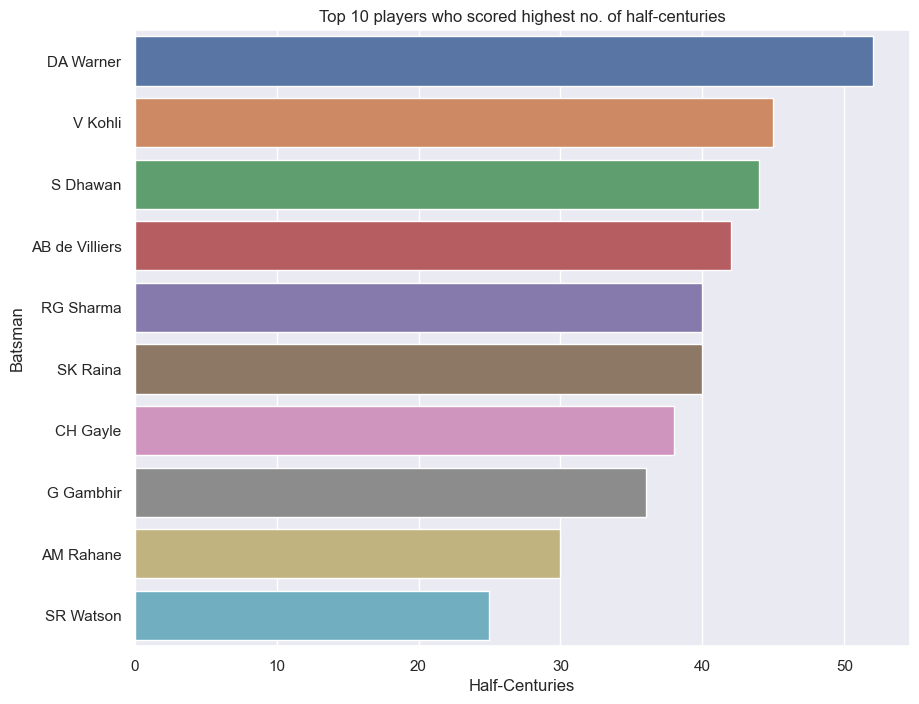

In [313]:
plt.figure(figsize=(10,8))
runs = data.groupby(['striker','start_date'])['runs_off_bat'].sum()
df = runs[runs >= 50].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Top 10 players who scored highest no. of half-centuries')
plt.xlabel('Half-Centuries')
plt.ylabel('Batsman')
plt.show()

# Orange cap holder of each season**

In [314]:
df = data.groupby(['season','striker'])['runs_off_bat'].sum().groupby('season').max()
temp_df=pd.DataFrame(data.groupby(['season','striker'])['runs_off_bat'].sum())
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for season,run in df.items():
    player = temp_df.loc[season][temp_df.loc[season]['runs_off_bat'] == run].index[0]
    print(season,'\t ',player,'\t\t',run)

Season    Player              Runs                          
2008 	  SE Marsh 		 616
2009 	  ML Hayden 		 572
2010 	  SR Tendulkar 		 617
2011 	  CH Gayle 		 608
2012 	  CH Gayle 		 733
2013 	  MEK Hussey 		 733
2014 	  RV Uthappa 		 660
2015 	  DA Warner 		 562
2016 	  V Kohli 		 973
2017 	  DA Warner 		 641
2018 	  KS Williamson 		 735
2019 	  DA Warner 		 692
2020 	  KL Rahul 		 676
2021 	  S Dhawan 		 85


# Maximum no. of sixes scored by an individual in every season**

In [315]:
data[data['runs_off_bat'] == 6].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:10]

striker
CH Gayle          17
BB McCullum       13
CH Gayle          13
CH Gayle          12
AB de Villiers    12
M Vijay           11
CH Gayle          11
AD Russell        11
ST Jayasuriya     11
SS Iyer           10
Name: season, dtype: int64

# Top 10 highest boundary hitters**

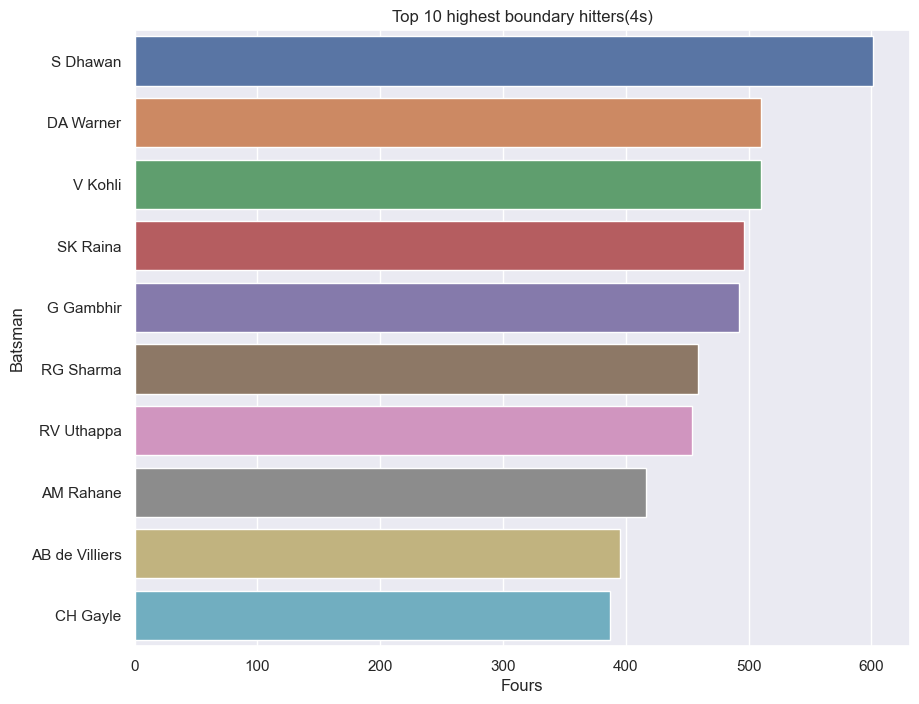

In [316]:
plt.figure(figsize=(10,8))
df = data[data['runs_off_bat'] == 4]['striker'].value_counts()[:10]
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Top 10 highest boundary hitters(4s)')
plt.xlabel('Fours')
plt.ylabel('Batsman')
plt.show()

# Most runs in an IPL season by Player

In [317]:
data.groupby(['striker','season'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         season
V Kohli         2016      973
DA Warner       2016      848
KS Williamson   2018      735
MEK Hussey      2013      733
CH Gayle        2012      733
                2013      720
DA Warner       2019      692
AB de Villiers  2016      687
RR Pant         2018      684
KL Rahul        2020      676
Name: runs_off_bat, dtype: int64

# No. of sixes in an IPL season

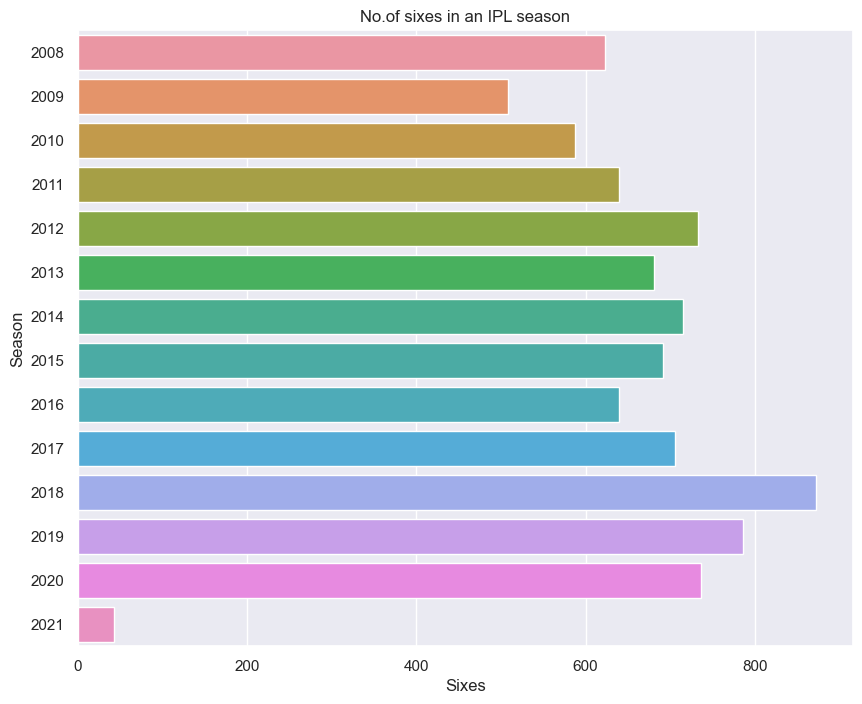

In [318]:
plt.figure(figsize=(10,8))
df = data[data['runs_off_bat'] == 6].groupby('season').count()['match_id'].sort_values(ascending=False)
sns.barplot(y=df.index,x=df,orient='h')
plt.title('No.of sixes in an IPL season')
plt.xlabel('Sixes')
plt.ylabel('Season')
plt.show()

# Top 10 highest sixes scorer batsman

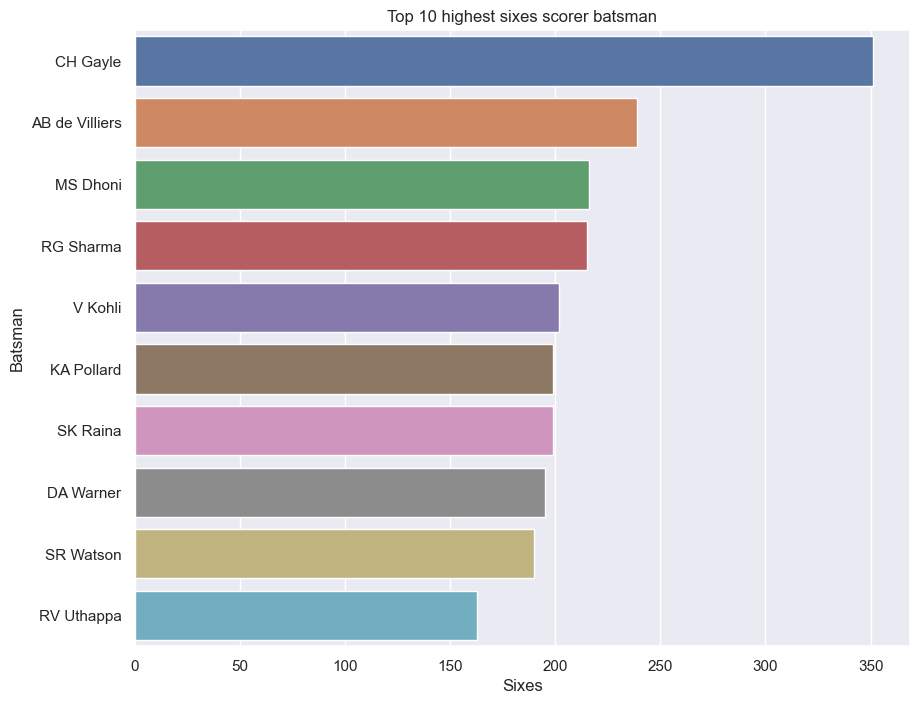

In [319]:
plt.figure(figsize=(10,8))
df = data[data['runs_off_bat'] == 6]['striker'].value_counts()[:10]
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Top 10 highest sixes scorer batsman')
plt.xlabel('Sixes')
plt.ylabel('Batsman')
plt.show()

# Top 10 highest run scorer in an individual innings in IPL

In [320]:
data.groupby(['striker','start_date'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         start_date
CH Gayle        2013-04-23    175
BB McCullum     2008-04-18    158
AB de Villiers  2015-05-10    133
KL Rahul        2020-09-24    132
AB de Villiers  2016-05-14    129
CH Gayle        2012-05-17    128
RR Pant         2018-05-10    128
M Vijay         2010-04-03    127
DA Warner       2017-04-30    126
V Sehwag        2014-05-30    122
Name: runs_off_bat, dtype: int64

# Most run conceded by a bowler in an inning

In [321]:
data.groupby(['bowler','start_date'])['run'].sum().droplevel(level=1).sort_values(ascending=False)[:10]

bowler
Basil Thampi        70
Mujeeb Ur Rahman    66
Sandeep Sharma      66
I Sharma            66
PJ Cummins          65
UT Yadav            65
AS Rajpoot          64
S Kaul              64
VR Aaron            63
TA Boult            63
Name: run, dtype: int64

# Purple Cap Holders

In [322]:
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
df = data[data['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)].groupby(['season','bowler']).count()['ball']
df=df.sort_values(ascending=False)[:30].sort_index(level=0)
val=0
lst=[]
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for (season,bowler),wicket in df.items():
    if season == val:
        lst.append(wicket)        
    else:
        print(season,'\t ',bowler,'\t\t',wicket)
        val = season
        lst=[]

Season    Player              Runs                          
2008 	  Sohail Tanvir 		 22
2009 	  A Kumble 		 21
2011 	  MM Patel 		 22
2012 	  M Morkel 		 25
2013 	  DJ Bravo 		 32
2014 	  MM Sharma 		 23
2015 	  A Nehra 		 22
2016 	  B Kumar 		 23
2017 	  B Kumar 		 26
2018 	  AJ Tye 		 24
2019 	  DL Chahar 		 22
2020 	  A Nortje 		 22


# Most IPL Wickets by a Bowler

In [323]:
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
data[data['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowler'].value_counts()[:10]

bowler
SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           154
Harbhajan Singh    150
R Ashwin           139
B Kumar            137
SP Narine          127
YS Chahal          121
UT Yadav           119
Name: count, dtype: int64

# Most Dot Ball by a Bowler

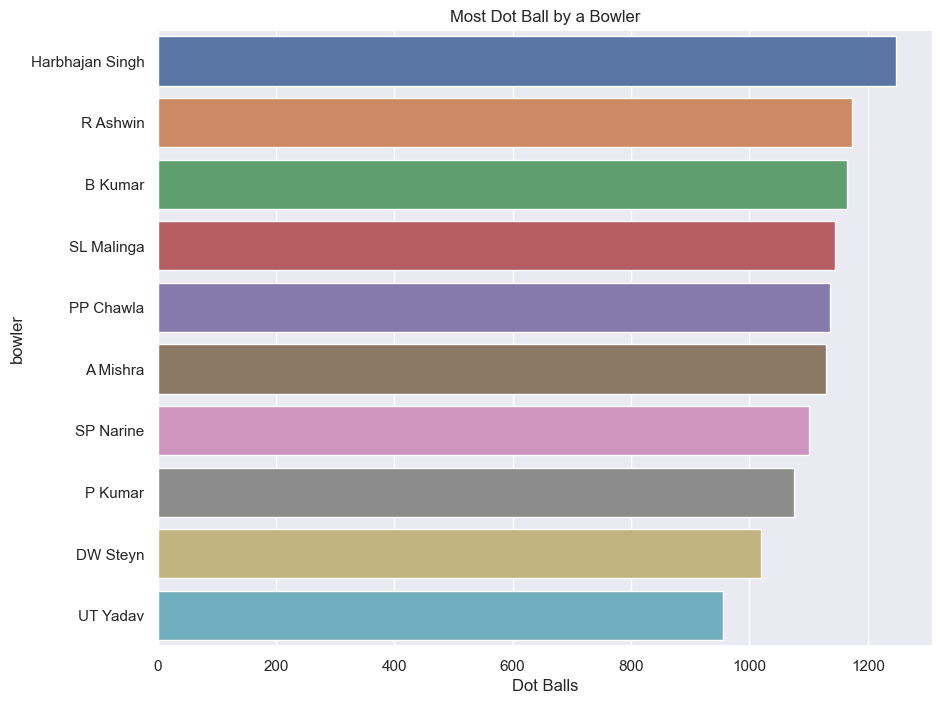

In [324]:
plt.figure(figsize=(10,8))
df = data[data['run'] == 0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:10]
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Most Dot Ball by a Bowler')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

# Most Maiden over by a Bowler

In [325]:
df = data.groupby(['start_date','bowler','over'])['run'].sum()
df = df[df.values == 0].droplevel(level=[0,2])
df.index.value_counts()[:10]

bowler
P Kumar           12
IK Pathan          9
SL Malinga         8
DW Steyn           8
B Kumar            7
DS Kulkarni        7
Sandeep Sharma     6
DJ Bravo           6
R Ashwin           5
Z Khan             5
Name: count, dtype: int64

# Most Wickets by an IPL Team

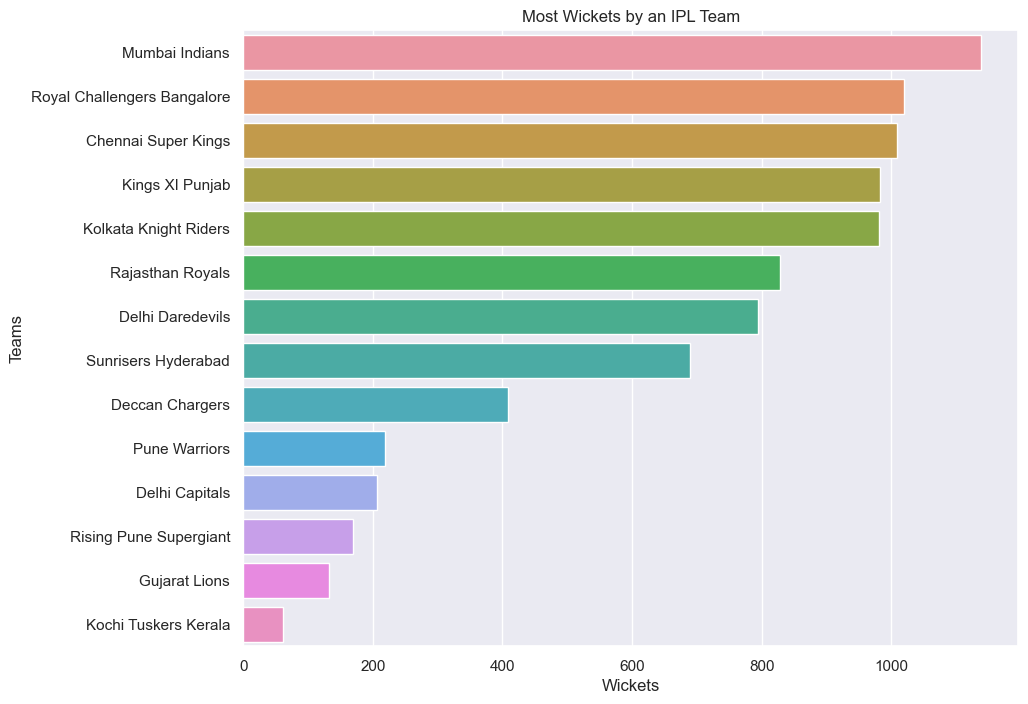

In [326]:
plt.figure(figsize=(10,8))
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
df = data[data['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowling_team'].value_counts()
data.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Most Wickets by an IPL Team')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

# Most No Balls by an IPL team

In [327]:
data.groupby(['batting_team'])['noballs'].agg('sum').sort_values(ascending=False)

batting_team
Royal Challengers Bangalore    106.0
Chennai Super Kings             96.0
Mumbai Indians                  96.0
Rajasthan Royals                94.0
Kolkata Knight Riders           90.0
Delhi Daredevils                73.0
Kings XI Punjab                 71.0
Sunrisers Hyderabad             53.0
Deccan Chargers                 49.0
Pune Warriors                   24.0
Delhi Capitals                  21.0
Gujarat Lions                   17.0
Kochi Tuskers Kerala            11.0
Rising Pune Supergiant           8.0
Name: noballs, dtype: float64

# Most No Balls by an IPL Bowler

In [328]:
data[data['noballs'] != 0]['bowler'].value_counts()[:10]

bowler
S Sreesanth    23
JJ Bumrah      23
A Mishra       21
I Sharma       21
UT Yadav       19
SL Malinga     18
AB Dinda       14
JA Morkel      13
M Morkel       13
RP Singh       13
Name: count, dtype: int64

# Most run given by a team in Extras

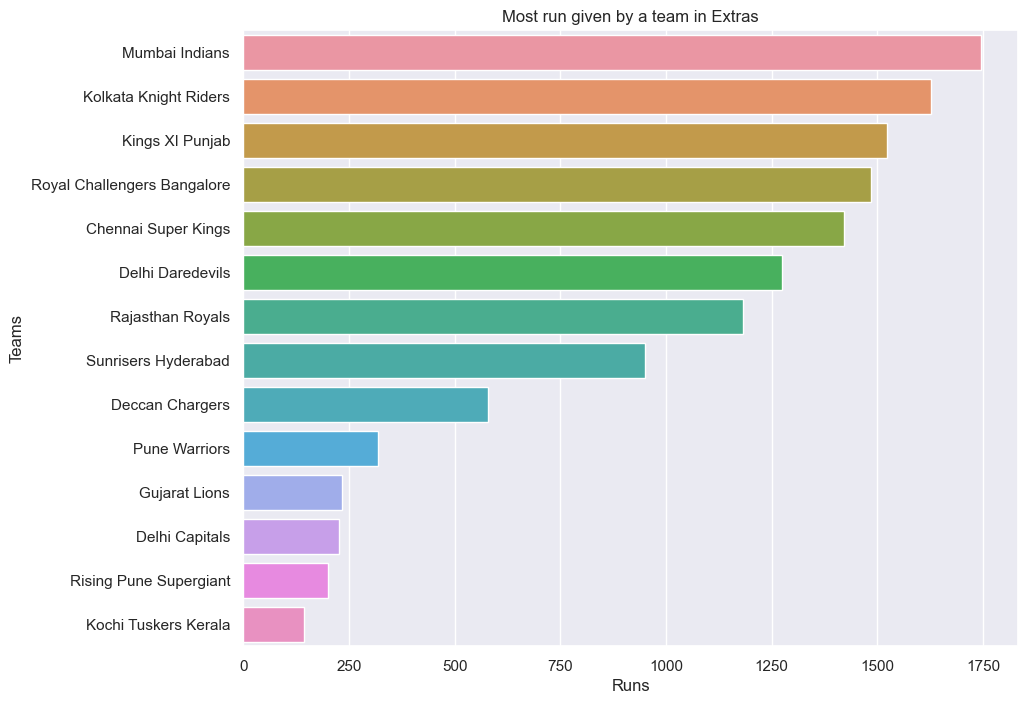

In [329]:
plt.figure(figsize=(10,8))
df = data.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=df.index,x=df,orient='h')
plt.title('Most run given by a team in Extras')
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

# Most Wides Conceded by an IPL team

In [330]:
data.groupby(['batting_team'])['wides'].agg('sum').sort_values(ascending=False)

batting_team
Mumbai Indians                 1002.0
Kolkata Knight Riders           912.0
Royal Challengers Bangalore     814.0
Kings XI Punjab                 786.0
Chennai Super Kings             785.0
Delhi Daredevils                717.0
Rajasthan Royals                652.0
Sunrisers Hyderabad             548.0
Deccan Chargers                 279.0
Pune Warriors                   169.0
Gujarat Lions                   134.0
Rising Pune Supergiant          118.0
Delhi Capitals                  117.0
Kochi Tuskers Kerala             89.0
Name: wides, dtype: float64

In [331]:
batsmen = data.groupby(['striker', 'season'])['runs_off_bat'].sum().reset_index()
bt=pd.DataFrame(batsmen)
bt.rename(columns={'runs_off_bat': 'Total Runs'},inplace=True)
bt.rename(columns={'striker': 'Batsman'},inplace=True)

bt.head()



Batsman  season  Total Runs
0  A Ashish Reddy    2012          35
1  A Ashish Reddy    2013         125
2  A Ashish Reddy    2015          73
3  A Ashish Reddy    2016          47
4      A Chandila    2012           0

In [332]:

new_batsmen_df = bt[bt['season'] >= 2011]
new_batsmen_df

Batsman  season  Total Runs
0     A Ashish Reddy    2012          35
1     A Ashish Reddy    2013         125
2     A Ashish Reddy    2015          73
3     A Ashish Reddy    2016          47
4         A Chandila    2012           0
...              ...     ...         ...
1986          Z Khan    2011          21
1987          Z Khan    2012          12
1988          Z Khan    2014           8
1989          Z Khan    2016           6
1990          Z Khan    2017           4

[1523 rows x 3 columns]

In [333]:
new_batsmen_df['season'].unique()

array([2012, 2013, 2015, 2016, 2017, 2018, 2011, 2014, 2019, 2020, 2021],
      dtype=int64)

In [334]:

total_runs_by_batsman = new_batsmen_df.groupby('Batsman')['Total Runs'].sum().reset_index()
total_runs_by_batsman = total_runs_by_batsman.sort_values(by='Total Runs', ascending=False)
total_runs_by_batsman = total_runs_by_batsman.head(30).reset_index(drop=True)

total_runs_by_batsman

Batsman  Total Runs
0          V Kohli        5203
1        DA Warner        4812
2         S Dhawan        4711
3         CH Gayle        4328
4   AB de Villiers        4245
5        RG Sharma        4081
6         SK Raina        4047
7        AM Rahane        3785
8       RV Uthappa        3740
9         MS Dhoni        3599
10       AT Rayudu        3326
11       SR Watson        3223
12      KD Karthik        3135
13       G Gambhir        3120
14       MK Pandey        2918
15      KA Pollard        2782
16        KL Rahul        2653
17       SV Samson        2584
18       SPD Smith        2343
19        PA Patel        2332
20    F du Plessis        2302
21     BB McCullum        2294
22         SS Iyer        2204
23       YK Pathan        2193
24        DR Smith        2103
25         RR Pant        2102
26         M Vijay        2101
27        SA Yadav        2055
28        AJ Finch        1985
29       Q de Kock        1962

In [335]:
# Extract the list of top 30 batsmen's names
top_30_batsmen = total_runs_by_batsman['Batsman'].tolist()

# Update your original DataFrame by filtering for the top 30 batsmen
updated_original_df = new_batsmen_df[new_batsmen_df['Batsman'].isin(top_30_batsmen)]
# Change the index to a new range index (0, 1, 2, ...)
updated_original_df = updated_original_df.reset_index(drop=True)

updated_original_df



Batsman  season  Total Runs
0    AB de Villiers    2011         312
1    AB de Villiers    2012         319
2    AB de Villiers    2013         373
3    AB de Villiers    2014         395
4    AB de Villiers    2015         513
..              ...     ...         ...
272       YK Pathan    2015         312
273       YK Pathan    2016         361
274       YK Pathan    2017         143
275       YK Pathan    2018         260
276       YK Pathan    2019          40

[277 rows x 3 columns]

In [336]:

seasons_played = updated_original_df.groupby('Batsman')['season'].nunique().reset_index()
seasons_played.rename(columns={'season': 'Total Seasons Played'}, inplace=True)
total_runs_by_batsman = total_runs_by_batsman.merge(seasons_played, on='Batsman', how='left')
total_runs_by_batsman

Batsman  Total Runs  Total Seasons Played
0          V Kohli        5203                    11
1        DA Warner        4812                    10
2         S Dhawan        4711                    11
3         CH Gayle        4328                    10
4   AB de Villiers        4245                    11
5        RG Sharma        4081                    11
6         SK Raina        4047                    10
7        AM Rahane        3785                    10
8       RV Uthappa        3740                    10
9         MS Dhoni        3599                    11
10       AT Rayudu        3326                    11
11       SR Watson        3223                    10
12      KD Karthik        3135                    11
13       G Gambhir        3120                     8
14       MK Pandey        2918                    11
15      KA Pollard        2782                    11
16        KL Rahul        2653                     7
17       SV Samson        2584                     8
18       SPD Smith        2343                     8
19        PA Patel        2332                     9
20    F du Plessis        2302                     9
21     BB McCullum        2294                     8
22         SS Iyer        2204                     6
23       YK Pathan        2193                     9
24        DR Smith        2103                     6
25         RR Pant        2102                     6
26         M Vijay        2101                     9
27        SA Yadav        2055                     9
28        AJ Finch        1985                     9
29       Q de Kock        1962                     7

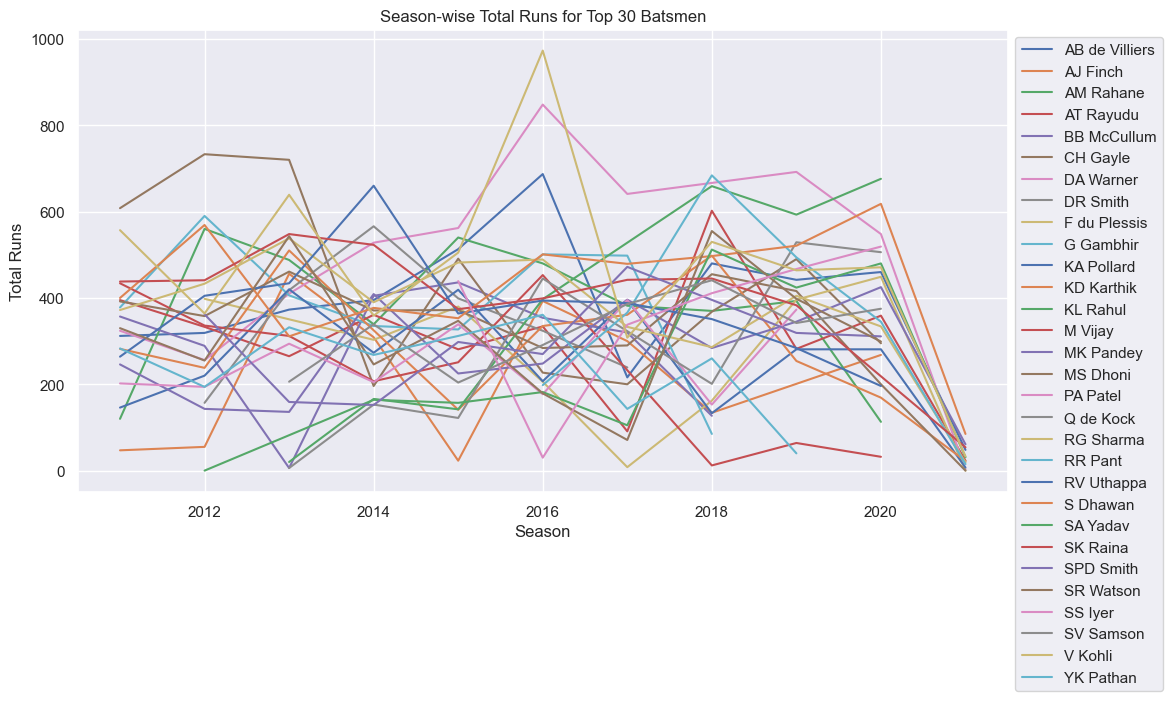

In [337]:

# Assuming 'updated_original_df' contains season-wise runs for the top 30 batsmen
# and has columns 'Batsman', 'season', and 'Total Runs'

# Create a line plot for season-wise runs for each of the top 30 batsmen
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
for batsman in updated_original_df['Batsman'].unique()[:30]:
    d1 = updated_original_df[updated_original_df['Batsman'] == batsman]
    plt.plot(d1['season'], d1['Total Runs'], label=batsman)

plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Season-wise Total Runs for Top 30 Batsmen')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


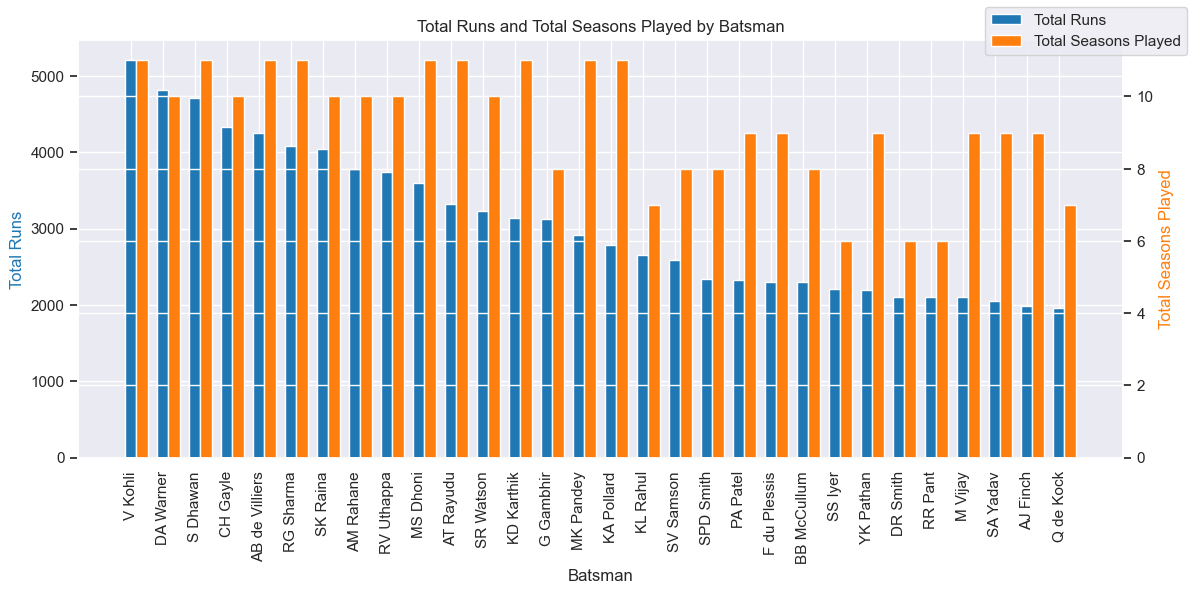

In [338]:

# Create positions for the bars
x = np.arange(len(total_runs_by_batsman))

# Define bar width
width = 0.35

# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bars for 'Total Runs' on the primary y-axis (left)
ax1.bar(x, total_runs_by_batsman['Total Runs'], width, label='Total Runs', color='tab:blue')

# Set the x-tick labels to be the batsmen's names
ax1.set_xticks(x)
ax1.set_xticklabels(total_runs_by_batsman['Batsman'], rotation=90)
ax1.set_xlabel('Batsman')
ax1.set_ylabel('Total Runs', color='tab:blue')

# Create a second y-axis (right) for 'Total Seasons Played'
ax2 = ax1.twinx()
ax2.bar(x + width, total_runs_by_batsman['Total Seasons Played'], width, label='Total Seasons Played', color='tab:orange')
ax2.set_ylabel('Total Seasons Played', color='tab:orange')

# Set the title and legend
plt.title('Total Runs and Total Seasons Played by Batsman')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()


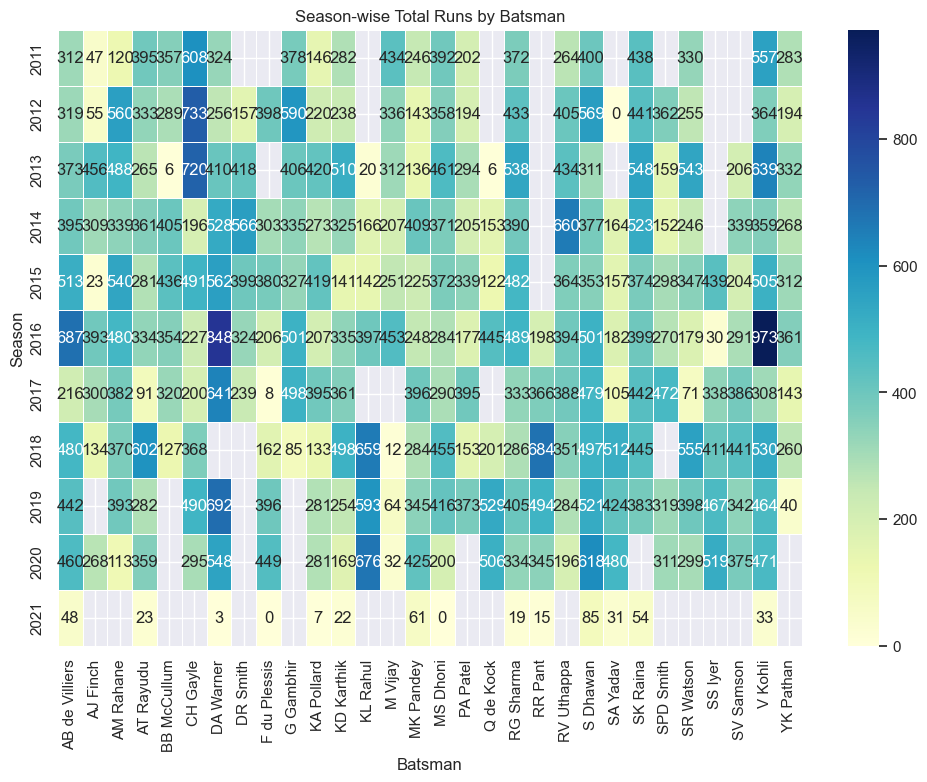

In [339]:
import seaborn as sns
# Pivot the DataFrame to create a table with seasons as rows, batsmen as columns, and runs as values
heatmap_data = updated_original_df.pivot(index='season', columns='Batsman', values='Total Runs')
# Set the figure size
plt.figure(figsize=(12, 8))
# Create a heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
# Set labels and title
plt.xlabel('Batsman')
plt.ylabel('Season')
plt.title('Season-wise Total Runs by Batsman')

# Show the plot
plt.show()


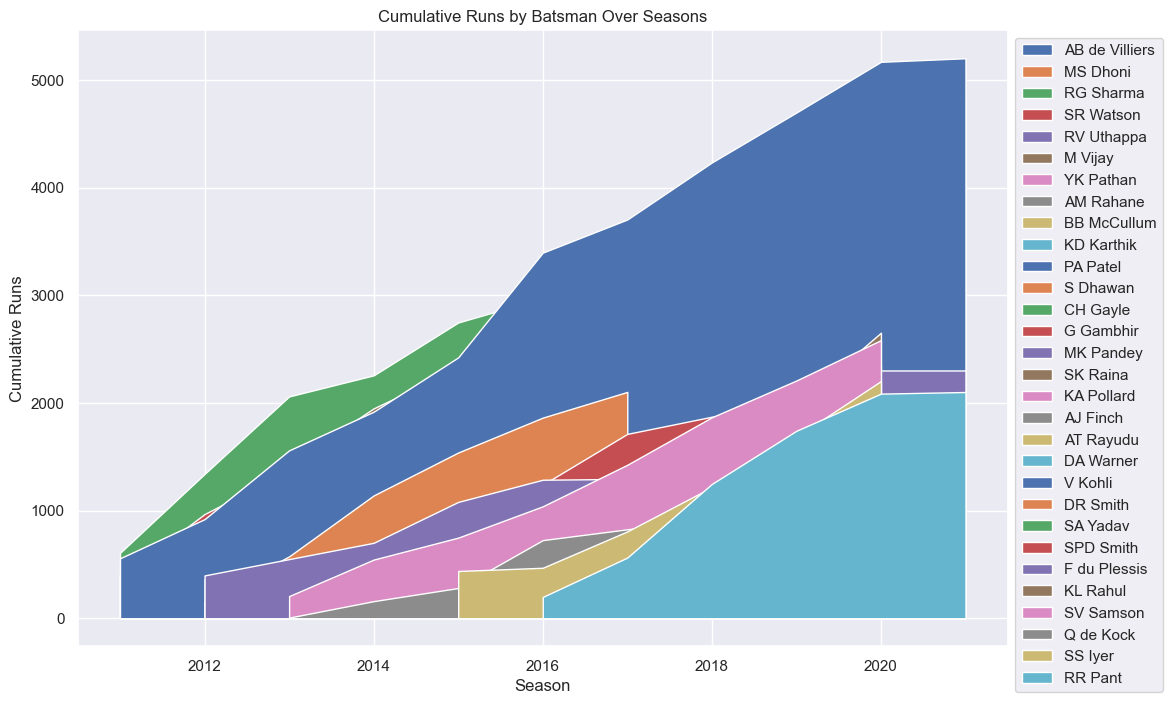

In [340]:

# Sort the DataFrame by 'season' to ensure the data is in chronological order
updated_original_df = updated_original_df.sort_values(by='season')

# Create a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Get the list of unique batsmen
batsmen = updated_original_df['Batsman'].unique()

# Create a dictionary to store the cumulative runs for each batsman
cumulative_runs = {batsman: [0] for batsman in batsmen}

# Iterate through the data to calculate cumulative runs
for batsman in batsmen:
    for index, row in updated_original_df[updated_original_df['Batsman'] == batsman].iterrows():
        previous_cumulative_runs = cumulative_runs[batsman][-1]
        cumulative_runs[batsman].append(previous_cumulative_runs + row['Total Runs'])

# Create a stacked area plot
for batsman in batsmen:
    seasons = updated_original_df[updated_original_df['Batsman'] == batsman]['season']
    runs = cumulative_runs[batsman][1:]
    ax.fill_between(seasons, runs, label=batsman)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Cumulative Runs')
plt.title('Cumulative Runs by Batsman Over Seasons')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.show()


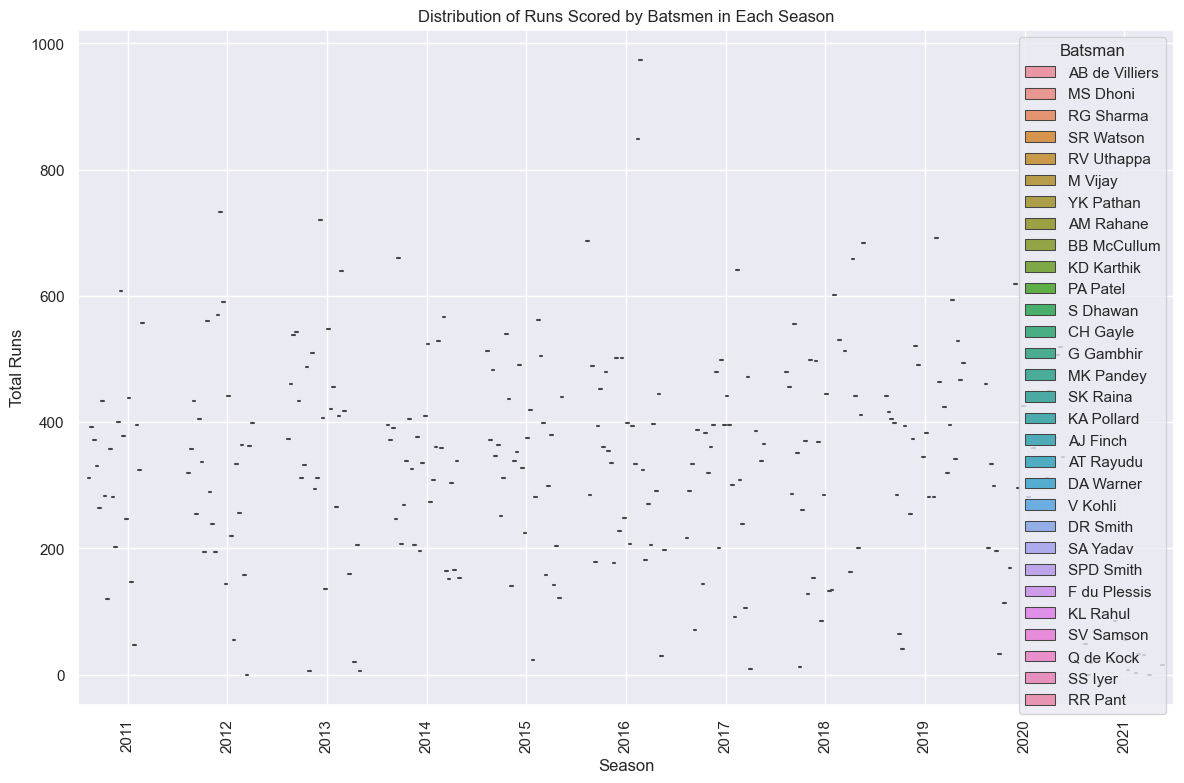

In [341]:

# Create a violin plot with 'Batsman' as hue
plt.figure(figsize=(12, 8))
sns.violinplot(x='season', y='Total Runs', data=updated_original_df, inner="quart", cut=0, hue='Batsman')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Distribution of Runs Scored by Batsmen in Each Season')

# Show the legend
plt.legend(title='Batsman', loc='upper right', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


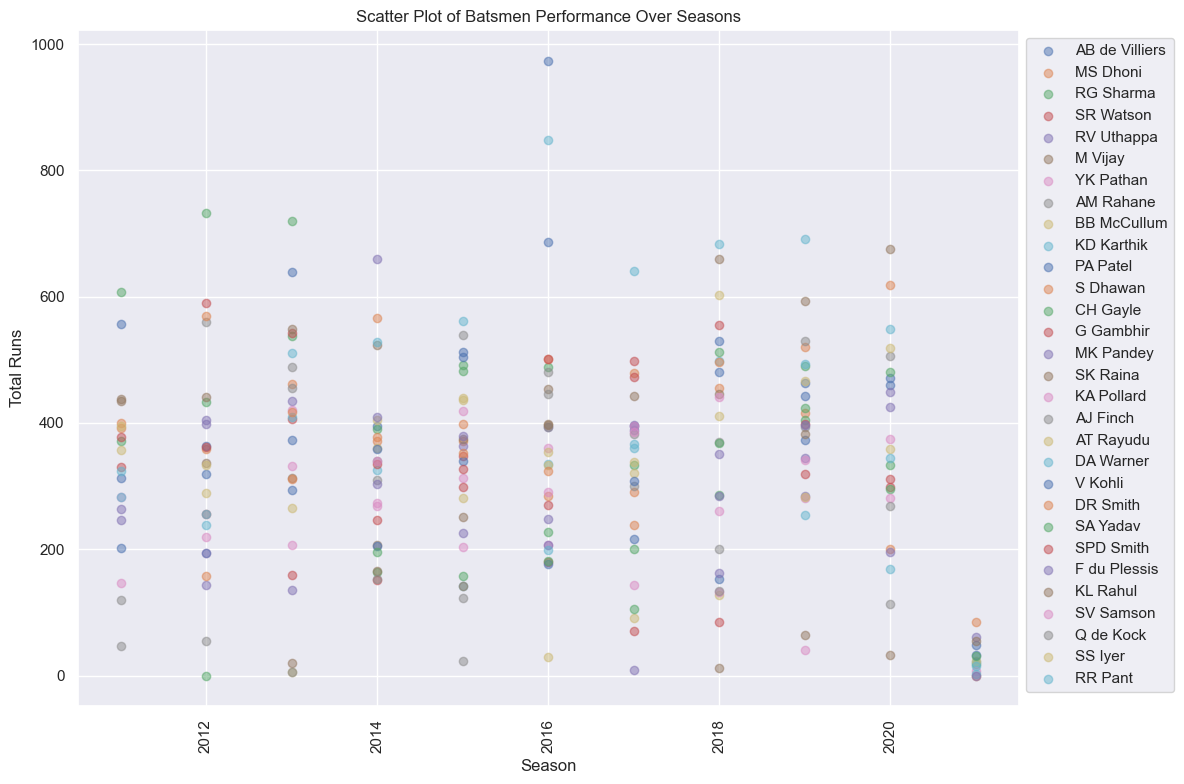

In [342]:


# Create a scatter plot
plt.figure(figsize=(12, 8))

# Iterate through unique batsmen and plot their performance
for batsman in updated_original_df['Batsman'].unique():
    d = updated_original_df[updated_original_df['Batsman'] == batsman]
    plt.scatter(d['season'], d['Total Runs'], label=batsman, alpha=0.5)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Scatter Plot of Batsmen Performance Over Seasons')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


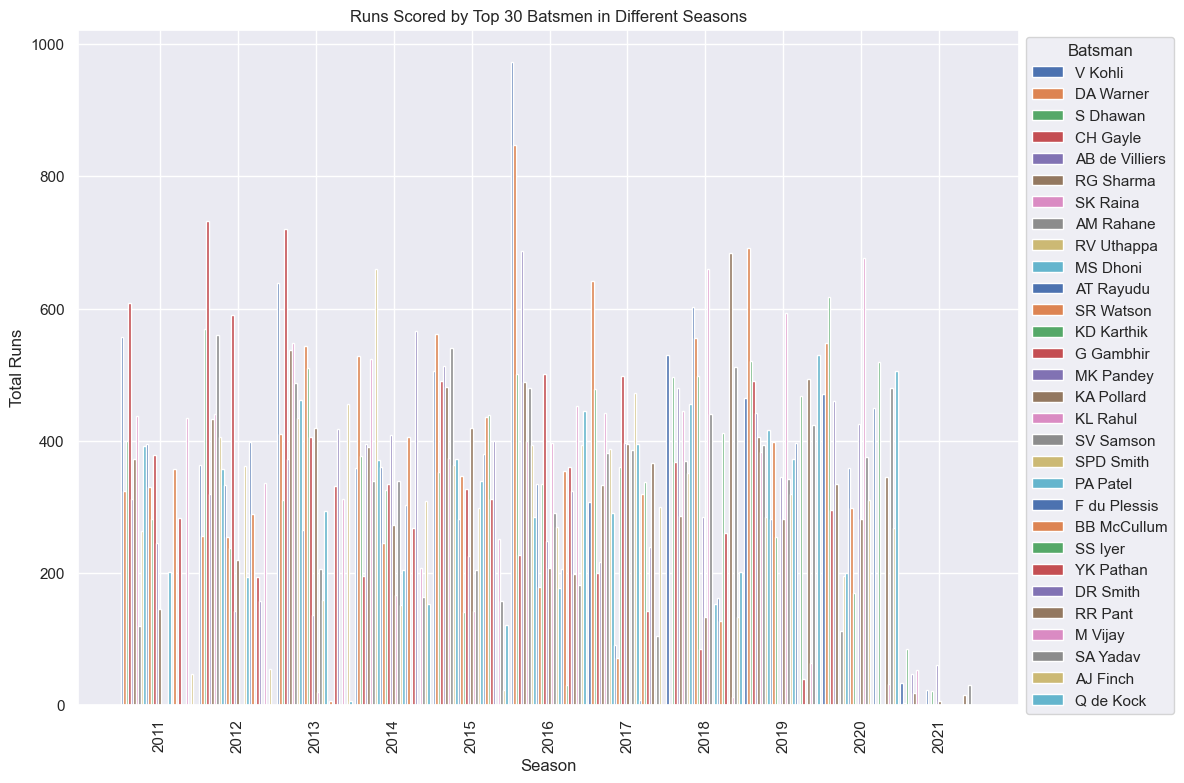

In [343]:


# Get the top 30 batsmen
top_30_batsmen = total_runs_by_batsman.head(30)['Batsman']

# Create a list of unique seasons
seasons = updated_original_df['season'].unique()
seasons.sort()  # Sort the seasons in chronological order

# Initialize a dictionary to store runs for each batsman in each season
data_dict = {batsman: [] for batsman in top_30_batsmen}

# Populate the data dictionary with runs for each batsman in each season
for batsman in top_30_batsmen:
    d1 = updated_original_df[(updated_original_df['Batsman'] == batsman) & (updated_original_df['season'].isin(seasons))]
    runs = [d1[d1['season'] == season]['Total Runs'].values[0] if season in d1['season'].values else 0 for season in seasons]
    data_dict[batsman] = runs

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis with space between groups
x = np.arange(len(seasons)) * (len(top_30_batsmen) + 1) * bar_width

# Create the grouped bar chart
plt.figure(figsize=(12, 8))

for i, batsman in enumerate(top_30_batsmen):
    plt.bar(x + i * bar_width, data_dict[batsman], bar_width, label=batsman)

# Set the x-axis labels to be the seasons
plt.xticks(x + (len(top_30_batsmen) / 2) * bar_width, seasons, rotation=90)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Runs Scored by Top 30 Batsmen in Different Seasons')

# Add a legend
plt.legend(title='Batsman', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\tanishq bhardwaj\AppData\Local\Temp\ipykernel_19696\1384569241.py:25: RuntimeWarning: invalid value encountered in scalar divide
  contribution = total_runs / d['Total Runs'].sum()


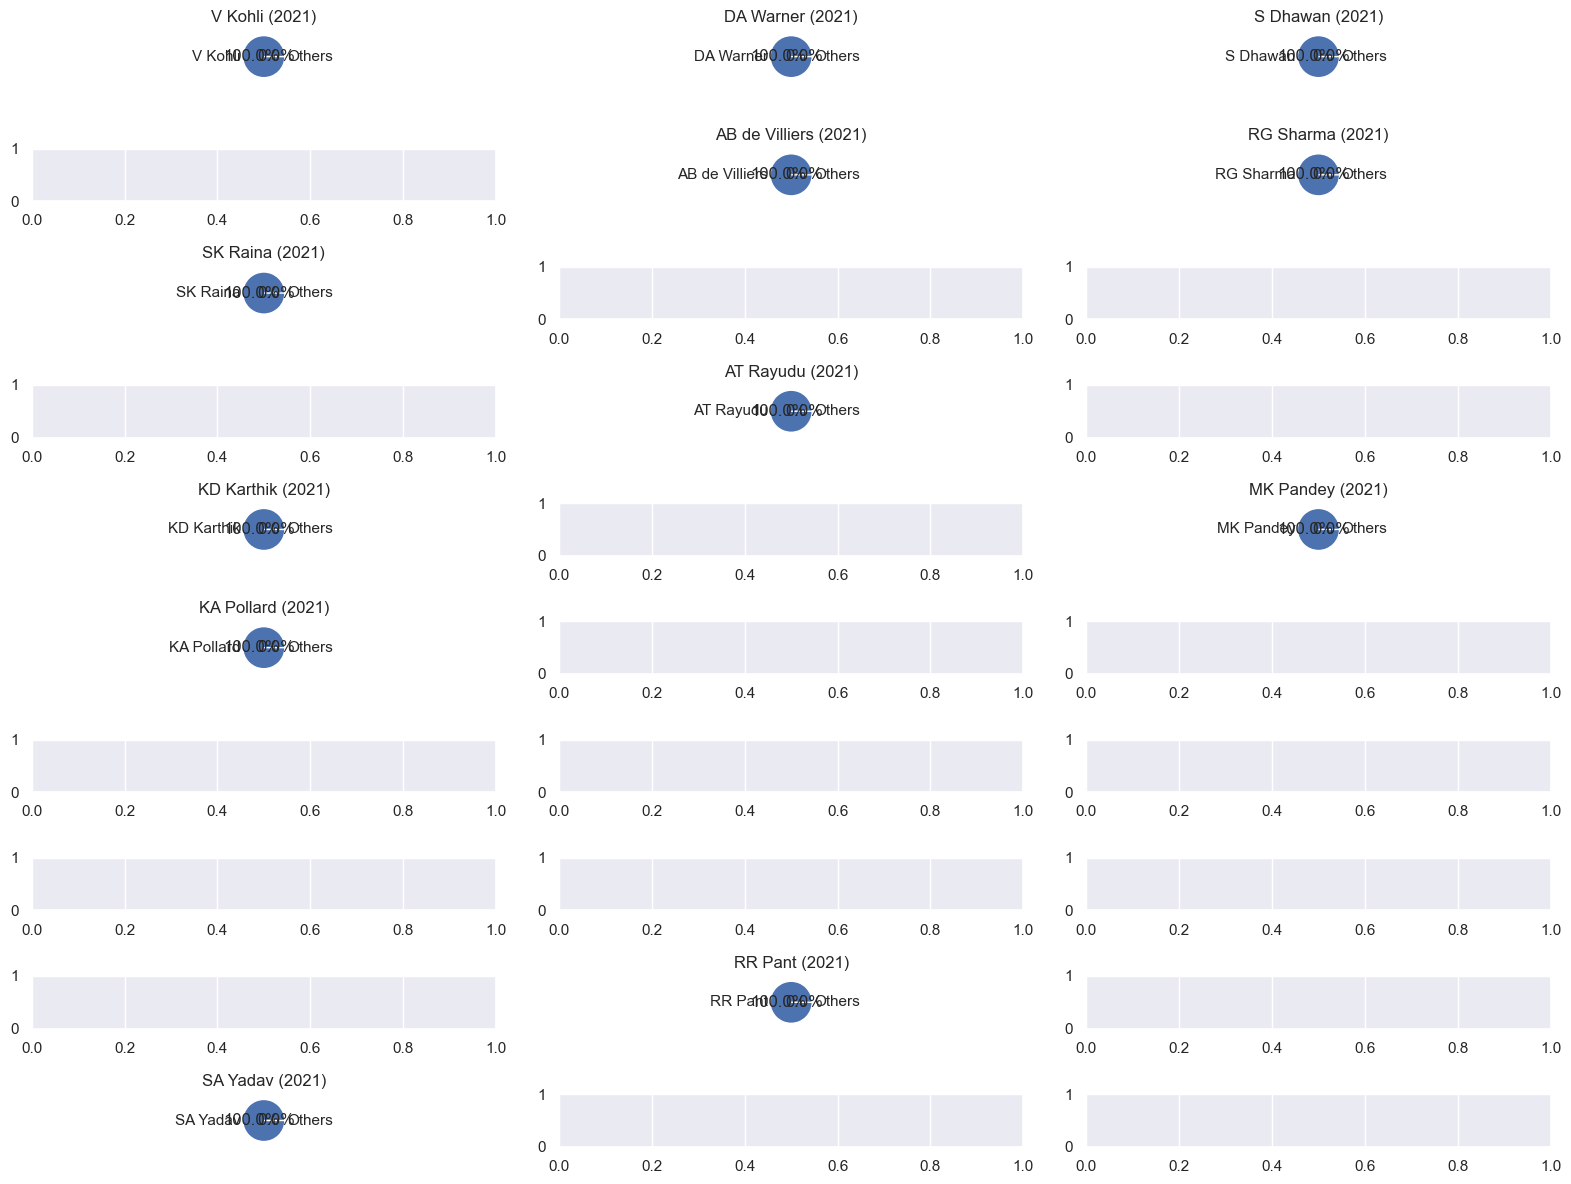

In [344]:
import matplotlib.pyplot as plt

# Assuming 'updated_original_df' contains 'Batsman', 'season', and 'Total Runs' columns

# Get the top 30 batsmen
top_30_batsmen = total_runs_by_batsman.head(30)['Batsman']

# Select a specific season for the pie charts
selected_season = 2021  # Change this to the desired season

# Create a figure with subplots for each pie chart
plt.figure(figsize=(16, 12))
num_rows = len(top_30_batsmen) // 3 + (len(top_30_batsmen) % 3 > 0)  # Arrange pie charts in 3 columns
num_cols = 3
position = range(1, len(top_30_batsmen) + 1)

for i, batsman in enumerate(top_30_batsmen):
    plt.subplot(num_rows, num_cols, position[i])
    
    # Filter the data for the selected season and batsman
    d = updated_original_df[(updated_original_df['Batsman'] == batsman) & (updated_original_df['season'] == selected_season)]
    
    if not d.empty:  # Replace 'data' with 'd'
        total_runs = d['Total Runs'].values[0]
        contribution = total_runs / d['Total Runs'].sum()
        
        # Check if the contribution is greater than zero before creating the pie chart
        if contribution > 0:
            plt.pie([contribution, 1 - contribution], labels=[batsman, 'Others'], autopct='%1.1f%%')
            plt.title(f'{batsman} ({selected_season})')

# Adjust the layout of subplots
plt.tight_layout()

# Show the pie charts
plt.show()


In [345]:
data.head()

match_id  season  start_date                  venue  innings  ball  \
0    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.1   
1    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.2   
2    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.3   
3    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.4   
4    335982    2008  2008-04-18  M.Chinnaswamy Stadium        1   0.5   

            batting_team                 bowling_team      striker  \
0  Kolkata Knight Riders  Royal Challengers Bangalore   SC Ganguly   
1  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
2  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
3  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
4  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   

   non_striker  ... runs_off_bat  extras  wides  noballs  byes  legbyes  \
0  BB McCullum  ...            0       1    0.0      0.0   0.0      1.0   
1   SC Ganguly  ...            0       0    0.0      0.0   0.0      0.0   
2   SC Ganguly  ...            0       1    1.0      0.0   0.0      0.0   
3   SC Ganguly  ...            0       0    0.0      0.0   0.0      0.0   
4   SC Ganguly  ...            0       0    0.0      0.0   0.0      0.0   

   wicket_type player_dismissed run  over  
0                                 1     0  
1                                 0     0  
2                                 1     0  
3                                 0     0  
4                                 0     0  

[5 rows x 21 columns]

In [346]:
bowler = data.groupby(['bowler', 'season'])['wicket_type'].sum().reset_index()
def count_words(sentence):
    words = sentence.split()
    return len(words)

# Apply the function to replace sentences with word counts
bowler['wicket_type'] = bowler['wicket_type'].apply(count_words)

# Rename the column if needed
bowler = bowler.rename(columns={'wicket_type': 'Total wickets'})


bowler.head()

bowler  season  Total wickets
0  A Ashish Reddy    2012             11
1  A Ashish Reddy    2013              5
2  A Ashish Reddy    2015              4
3  A Ashish Reddy    2016              1
4      A Chandila    2012              7

In [347]:
new_bowlers_df = bowler[bowler['season'] >= 2011]
new_bowlers_df

bowler  season  Total wickets
0     A Ashish Reddy    2012             11
1     A Ashish Reddy    2013              5
2     A Ashish Reddy    2015              4
3     A Ashish Reddy    2016              1
4         A Chandila    2012              7
...              ...     ...            ...
1470          Z Khan    2013              6
1471          Z Khan    2014              7
1472          Z Khan    2015              8
1473          Z Khan    2016             13
1474          Z Khan    2017             14

[1142 rows x 3 columns]

In [348]:
total_runs_by_bowlers = new_bowlers_df.groupby('bowler')['Total wickets'].sum().reset_index()
total_runs_by_bowlers = total_runs_by_bowlers.sort_values(by='Total wickets', ascending=False)
bowlers_total_wickets=total_runs_by_bowlers
total_runs_by_bowlers = total_runs_by_bowlers.head(30).reset_index(drop=True)

total_runs_by_bowlers

bowler  Total wickets
0          DJ Bravo            176
1        SL Malinga            164
2         SP Narine            164
3           B Kumar            161
4          R Ashwin            155
5   Harbhajan Singh            139
6         PP Chawla            133
7          UT Yadav            133
8         YS Chahal            132
9         JJ Bumrah            131
10        RA Jadeja            130
11         A Mishra            127
12   Sandeep Sharma            123
13    R Vinay Kumar            107
14        MM Sharma            106
15         AR Patel             99
16        CH Morris             99
17       JD Unadkat             96
18         M Morkel             95
19        SR Watson             90
20      Imran Tahir             89
21   Mohammed Shami             88
22           Z Khan             88
23      Rashid Khan             87
24          A Nehra             87
25      JP Faulkner             86
26       AD Russell             80
27      DS Kulkarni             80
28   MJ McClenaghan             76
29  Shakib Al Hasan             75

In [349]:
# Extract the list of top 30 batsmen's names
top_30_bowlers= total_runs_by_bowlers['bowler'].tolist()

# Update your original DataFrame by filtering for the top 30 batsmen
updated_og_df = new_bowlers_df[new_bowlers_df['bowler'].isin(top_30_bowlers)]
# Change the index to a new range index (0, 1, 2, ...)
updated_og_df = updated_og_df.reset_index(drop=True)

updated_og_df

bowler  season  Total wickets
0    A Mishra    2011             18
1    A Mishra    2012             13
2    A Mishra    2013             25
3    A Mishra    2014              9
4    A Mishra    2015              9
..        ...     ...            ...
246    Z Khan    2013              6
247    Z Khan    2014              7
248    Z Khan    2015              8
249    Z Khan    2016             13
250    Z Khan    2017             14

[251 rows x 3 columns]

In [350]:
seasons_played = updated_og_df.groupby('bowler')['season'].nunique().reset_index()
seasons_played.rename(columns={'season': 'Total Seasons Played'}, inplace=True)
total_runs_by_bowlers = total_runs_by_bowlers.merge(seasons_played, on='bowler', how='left')
total_runs_by_bowlers

bowler  Total wickets  Total Seasons Played
0          DJ Bravo            176                     9
1        SL Malinga            164                     7
2         SP Narine            164                     9
3           B Kumar            161                    11
4          R Ashwin            155                    10
5   Harbhajan Singh            139                    10
6         PP Chawla            133                    10
7          UT Yadav            133                    10
8         YS Chahal            132                     9
9         JJ Bumrah            131                     9
10        RA Jadeja            130                    11
11         A Mishra            127                    11
12   Sandeep Sharma            123                     9
13    R Vinay Kumar            107                     8
14        MM Sharma            106                     8
15         AR Patel             99                     7
16        CH Morris             99                     7
17       JD Unadkat             96                    10
18         M Morkel             95                     6
19        SR Watson             90                     8
20      Imran Tahir             89                     7
21   Mohammed Shami             88                     7
22           Z Khan             88                     7
23      Rashid Khan             87                     5
24          A Nehra             87                     6
25      JP Faulkner             86                     7
26       AD Russell             80                     9
27      DS Kulkarni             80                    10
28   MJ McClenaghan             76                     5
29  Shakib Al Hasan             75                     9

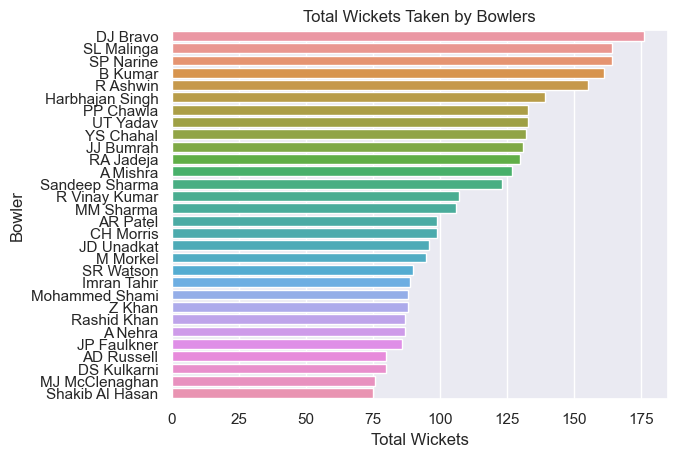

In [351]:

# Assuming 'df' is your DataFrame
sns.barplot(x='Total wickets', y='bowler', data=total_runs_by_bowlers, orient='h')
plt.title('Total Wickets Taken by Bowlers')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()


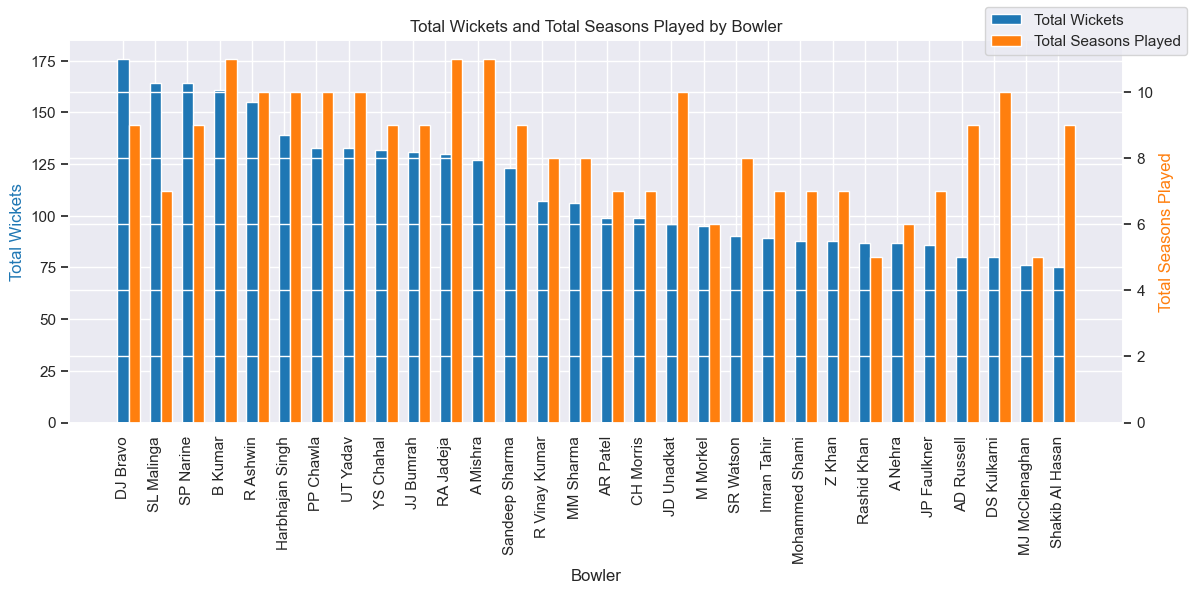

In [352]:

b = total_runs_by_bowlers['bowler']
total_wickets = total_runs_by_bowlers['Total wickets']
total_seasons_played = total_runs_by_bowlers['Total Seasons Played']

# Create positions for the bars
x = np.arange(len(b))

# Define bar width
width = 0.35

# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bars for 'Total Wickets' on the primary y-axis (left)
ax1.bar(x, total_wickets, width, label='Total Wickets', color='tab:blue')

# Set the x-tick labels to be the bowlers' names
ax1.set_xticks(x)
ax1.set_xticklabels(b, rotation=90)
ax1.set_xlabel('Bowler')
ax1.set_ylabel('Total Wickets', color='tab:blue')

# Create a second y-axis (right) for 'Total Seasons Played'
ax2 = ax1.twinx()
ax2.bar(x + width, total_seasons_played, width, label='Total Seasons Played', color='tab:orange')
ax2.set_ylabel('Total Seasons Played', color='tab:orange')

# Set the title and legend
plt.title('Total Wickets and Total Seasons Played by Bowler')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()


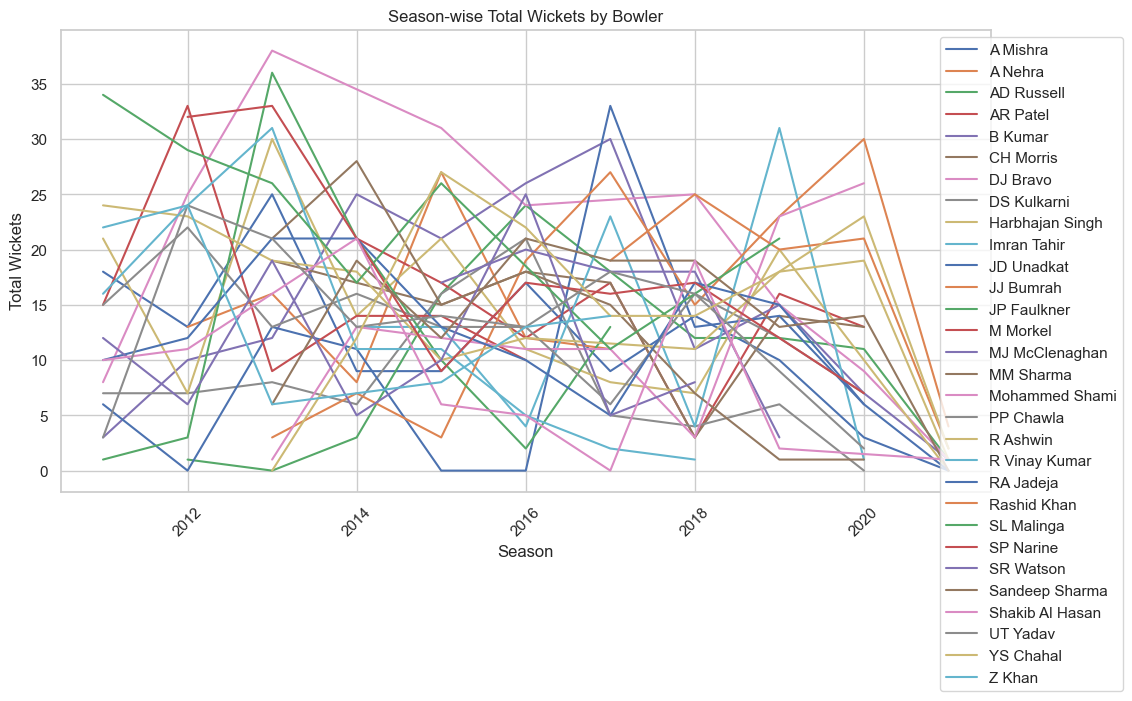

In [353]:

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a line plot for each bowler
for bowler, d in updated_og_df.groupby('bowler'):
    plt.plot(d['season'], d['Total wickets'], label=bowler)

plt.title('Season-wise Total Wickets by Bowler')
plt.xlabel('Season')
plt.ylabel('Total Wickets')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Optionally, you can rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


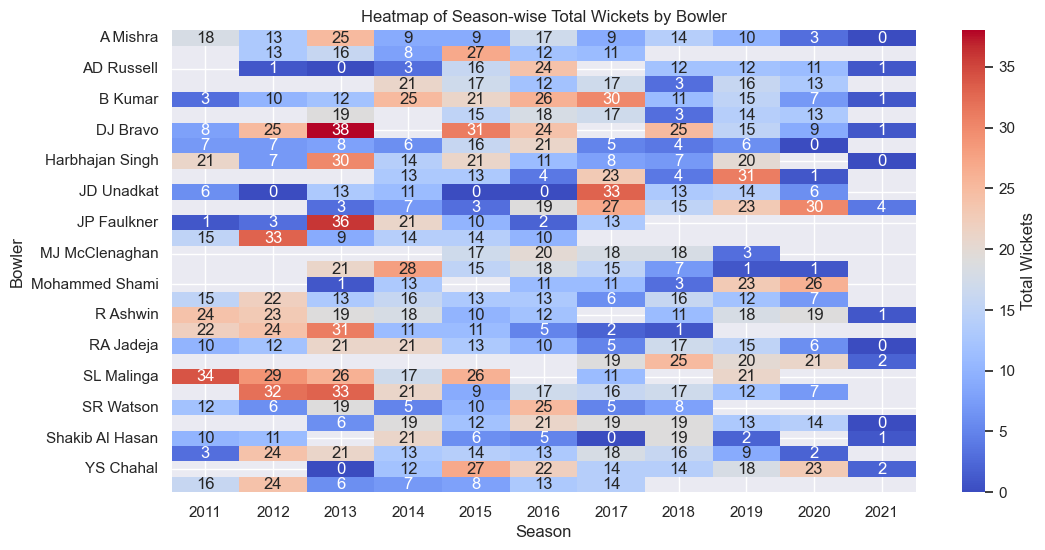

In [354]:


# Pivot the DataFrame to prepare it for the heatmap
pivot_df = updated_og_df.pivot(index='bowler', columns='season', values='Total wickets')

plt.figure(figsize=(12, 6))
sns.set(font_scale=1)  # Adjust the font size for better readability

# Create the heatmap
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Total Wickets'})

plt.title('Heatmap of Season-wise Total Wickets by Bowler')
plt.xlabel('Season')
plt.ylabel('Bowler')

plt.show()


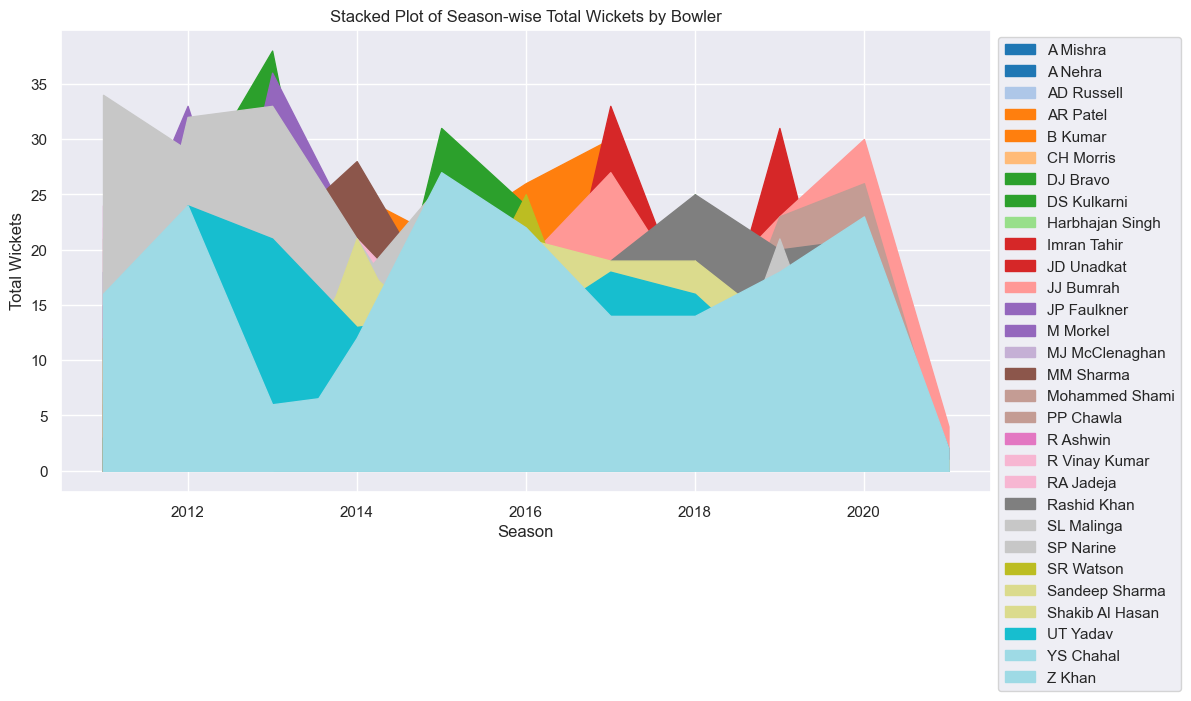

In [355]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'updated_og_df' is your DataFrame
# Make sure the 'seson' column contains the season information as a numeric value or string

# Pivot the DataFrame to prepare it for the stacked plot
pivot_df = updated_og_df.pivot_table(index='season', columns='bowler', values='Total wickets', aggfunc='sum').fillna(0)

# Create the stacked plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define a colormap for different bowlers
colormap = plt.get_cmap('tab20', len(pivot_df.columns))

for b in pivot_df.columns:
    ax.fill_between(pivot_df.index, pivot_df[b], label=b, color=colormap(pivot_df.columns.get_loc(b)))

plt.title('Stacked Plot of Season-wise Total Wickets by Bowler')
plt.xlabel('Season')
plt.ylabel('Total Wickets')

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


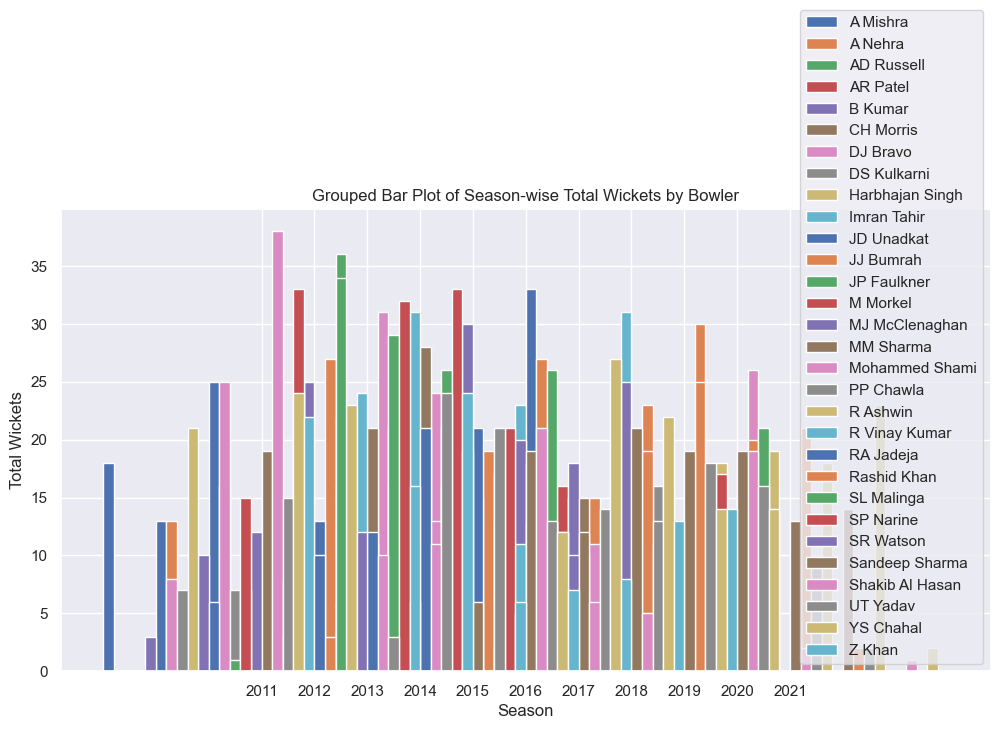

In [356]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'updated_og_df' is your DataFrame
# Make sure the 'season' column contains the season information as a numeric value or string

# Pivot the DataFrame to prepare it for the grouped bar plot
pivot_df = updated_og_df.pivot(index='season', columns='bowler', values='Total wickets').fillna(0)

# Get the unique seasons
seasons = pivot_df.index

# Get the unique bowlers
b1 = pivot_df.columns

# Define the number of bowlers and seasons
num_bowlers = len(b1)
num_seasons = len(seasons)

# Set the width of the bars
bar_width = 0.2 # Adjust the bar width to control the gap between groups

# Define the x-axis positions for each group of bars with gaps
x = np.arange(num_seasons)

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, b in enumerate(b1):
    ax.bar(x + i * bar_width, pivot_df[b], width=bar_width, label=b)

ax.set_xlabel('Season')
ax.set_ylabel('Total Wickets')
ax.set_title('Grouped Bar Plot of Season-wise Total Wickets by Bowler')
ax.set_xticks(x + ((num_bowlers - 1) * bar_width) / 2)
ax.set_xticklabels(seasons)
ax.legend()

plt.show()


In [357]:

# Group the data by 'striker' and 'season', and calculate the average runs
average_runs_df = data.groupby(['striker', 'season'])['runs_off_bat'].mean().reset_index()
average_runs_df=pd.DataFrame(average_runs_df)

# Rename the 'runs' column to 'average_runs'
average_runs_df.rename(columns={'striker': 'Batsman'}, inplace=True)
average_runs_df.rename(columns={'runs_off_bat': 'Average'}, inplace=True)

# Display the new DataFrame
average_runs_df


Batsman  season   Average
0     A Ashish Reddy    2012  1.166667
1     A Ashish Reddy    2013  1.388889
2     A Ashish Reddy    2015  1.586957
3     A Ashish Reddy    2016  1.566667
4         A Chandila    2012  0.000000
...              ...     ...       ...
1986          Z Khan    2011  0.875000
1987          Z Khan    2012  0.705882
1988          Z Khan    2014  1.142857
1989          Z Khan    2016  0.461538
1990          Z Khan    2017  0.307692

[1991 rows x 3 columns]

In [358]:
unique_match_count_df = data.groupby(['striker', 'season'])['match_id'].nunique().reset_index()
unique_match_count_df

striker  season  match_id
0     A Ashish Reddy    2012         5
1     A Ashish Reddy    2013        10
2     A Ashish Reddy    2015         5
3     A Ashish Reddy    2016         3
4         A Chandila    2012         1
...              ...     ...       ...
1986          Z Khan    2011         2
1987          Z Khan    2012         4
1988          Z Khan    2014         3
1989          Z Khan    2016         2
1990          Z Khan    2017         3

[1991 rows x 3 columns]

In [359]:
unique_match_count_df.rename(columns={'striker': 'Batsman'}, inplace=True)
unique_match_count_df

Batsman  season  match_id
0     A Ashish Reddy    2012         5
1     A Ashish Reddy    2013        10
2     A Ashish Reddy    2015         5
3     A Ashish Reddy    2016         3
4         A Chandila    2012         1
...              ...     ...       ...
1986          Z Khan    2011         2
1987          Z Khan    2012         4
1988          Z Khan    2014         3
1989          Z Khan    2016         2
1990          Z Khan    2017         3

[1991 rows x 3 columns]

In [360]:
# Inner join 'average_runs_df' with 'updated_original_df' to keep matching rows
merged_df = unique_match_count_df.merge(updated_original_df, on=['Batsman', 'season'], how='inner')
merged_df['average'] = merged_df['Total Runs'] / merged_df['match_id']

# Display the resulting DataFrame
merged_df


Batsman  season  match_id  Total Runs    average
0    AB de Villiers    2011        13         312  24.000000
1    AB de Villiers    2012        13         319  24.538462
2    AB de Villiers    2013        14         373  26.642857
3    AB de Villiers    2014        13         395  30.384615
4    AB de Villiers    2015        14         513  36.642857
..              ...     ...       ...         ...        ...
272       YK Pathan    2015        12         312  26.000000
273       YK Pathan    2016        13         361  27.769231
274       YK Pathan    2017        11         143  13.000000
275       YK Pathan    2018        13         260  20.000000
276       YK Pathan    2019         7          40   5.714286

[277 rows x 5 columns]

In [361]:

# Count the number of appearances for each striker in each season
appearances_df = data.groupby(['striker', 'season']).size().reset_index(name='total_balls_faced')
appearances_df.rename(columns={'striker':'Batsman'},inplace=True)
appearances_df = appearances_df.merge(updated_original_df, on=['Batsman', 'season'], how='inner')
appearances_df['strike_rate']=(appearances_df['Total Runs']/appearances_df['total_balls_faced'])*100
appearances_df.columns.nunique()
appearances_df


# Display the updated 'merged_df' DataFrame





Batsman  season  total_balls_faced  Total Runs  strike_rate
0    AB de Villiers    2011                248         312   125.806452
1    AB de Villiers    2012                203         319   157.142857
2    AB de Villiers    2013                226         373   165.044248
3    AB de Villiers    2014                255         395   154.901961
4    AB de Villiers    2015                302         513   169.867550
..              ...     ...                ...         ...          ...
272       YK Pathan    2015                243         312   128.395062
273       YK Pathan    2016                256         361   141.015625
274       YK Pathan    2017                123         143   116.260163
275       YK Pathan    2018                211         260   123.222749
276       YK Pathan    2019                 47          40    85.106383

[277 rows x 5 columns]

In [362]:
appearances_df.drop('total_balls_faced',axis=1,inplace=True)
appearances_df.drop('Total Runs',axis=1,inplace=True)
appearances_df

Batsman  season  strike_rate
0    AB de Villiers    2011   125.806452
1    AB de Villiers    2012   157.142857
2    AB de Villiers    2013   165.044248
3    AB de Villiers    2014   154.901961
4    AB de Villiers    2015   169.867550
..              ...     ...          ...
272       YK Pathan    2015   128.395062
273       YK Pathan    2016   141.015625
274       YK Pathan    2017   116.260163
275       YK Pathan    2018   123.222749
276       YK Pathan    2019    85.106383

[277 rows x 3 columns]

In [363]:
merged_df=appearances_df.merge(merged_df, on=['Batsman', 'season'], how='inner')
merged_df

Batsman  season  strike_rate  match_id  Total Runs    average
0    AB de Villiers    2011   125.806452        13         312  24.000000
1    AB de Villiers    2012   157.142857        13         319  24.538462
2    AB de Villiers    2013   165.044248        14         373  26.642857
3    AB de Villiers    2014   154.901961        13         395  30.384615
4    AB de Villiers    2015   169.867550        14         513  36.642857
..              ...     ...          ...       ...         ...        ...
272       YK Pathan    2015   128.395062        12         312  26.000000
273       YK Pathan    2016   141.015625        13         361  27.769231
274       YK Pathan    2017   116.260163        11         143  13.000000
275       YK Pathan    2018   123.222749        13         260  20.000000
276       YK Pathan    2019    85.106383         7          40   5.714286

[277 rows x 6 columns]

In [364]:
# Assuming 'merged_df' is your DataFrame with columns 'Batsman', 'season', and 'strike_rate'

# Group the data by 'Batsman' and calculate the mean strike rate for each batsman
mean_strike_rate_df = merged_df.groupby('Batsman')['strike_rate'].mean().reset_index()

# Rename the columns for clarity
mean_strike_rate_df.columns = ['Batsman', 'Mean Strike Rate']

# Display the new DataFrame with the mean strike rates
mean_strike_rate_df


Batsman  Mean Strike Rate
0   AB de Villiers        156.324811
1         AJ Finch        115.180596
2        AM Rahane        118.276529
3        AT Rayudu        123.244984
4      BB McCullum        123.305643
5         CH Gayle        139.898290
6        DA Warner        131.620774
7         DR Smith        136.303968
8     F du Plessis        110.361340
9        G Gambhir        115.680138
10      KA Pollard        133.867527
11      KD Karthik        134.769019
12        KL Rahul        127.107459
13         M Vijay        108.322474
14       MK Pandey        119.230221
15        MS Dhoni        121.050325
16        PA Patel        121.315792
17       Q de Kock        118.814753
18       RG Sharma        127.227941
19         RR Pant        139.680964
20      RV Uthappa        125.988533
21        S Dhawan        127.984499
22        SA Yadav        116.374950
23        SK Raina        133.098947
24       SPD Smith        127.248941
25       SR Watson        127.857740
26         SS Iyer        114.910307
27       SV Samson        130.446277
28         V Kohli        126.056993
29       YK Pathan        126.040602

In [365]:
# Assuming 'merged_df' is your DataFrame with columns 'Batsman', 'season', and 'average'

# Group the data by 'Batsman' and calculate the mean average for each batsman
mean_average_df = merged_df.groupby('Batsman')['average'].mean().reset_index()

# Rename the columns for clarity
mean_average_df.columns = ['Batsman', 'Mean Average']

# Display the new DataFrame with the mean average
print(mean_average_df)


           Batsman  Mean Average
0   AB de Villiers     33.421800
1         AJ Finch     21.376645
2        AM Rahane     27.798748
3        AT Rayudu     24.208567
4      BB McCullum     23.749860
5         CH Gayle     36.308495
6        DA Warner     35.098995
7         DR Smith     27.893381
8     F du Plessis     24.513533
9        G Gambhir     26.823612
10      KA Pollard     19.638582
11      KD Karthik     21.639322
12        KL Rahul     31.328231
13         M Vijay     22.492370
14       MK Pandey     27.731988
15        MS Dhoni     22.846138
16        PA Patel     21.127610
17       Q de Kock     26.938154
18       RG Sharma     26.374695
19         RR Pant     27.552976
20      RV Uthappa     26.219703
21        S Dhawan     36.219130
22        SA Yadav     20.873386
23        SK Raina     30.316530
24       SPD Smith     27.408929
25       SR Watson     26.751448
26         SS Iyer     25.976018
27       SV Samson     25.107018
28         V Kohli     34.839502
29       Y

In [366]:
# Assuming you have mean_average_df and mean_strike_rate_df as your DataFrames

# Merge the DataFrames on the 'Batsman' column
combined_df = mean_average_df.merge(mean_strike_rate_df, on='Batsman', how='inner')
total_runs_by_batsman=total_runs_by_batsman.merge(combined_df,on='Batsman',how='inner')

# Display the combined DataFrame
total_runs_by_batsman


Batsman  Total Runs  Total Seasons Played  Mean Average  \
0          V Kohli        5203                    11     34.839502   
1        DA Warner        4812                    10     35.098995   
2         S Dhawan        4711                    11     36.219130   
3         CH Gayle        4328                    10     36.308495   
4   AB de Villiers        4245                    11     33.421800   
5        RG Sharma        4081                    11     26.374695   
6         SK Raina        4047                    10     30.316530   
7        AM Rahane        3785                    10     27.798748   
8       RV Uthappa        3740                    10     26.219703   
9         MS Dhoni        3599                    11     22.846138   
10       AT Rayudu        3326                    11     24.208567   
11       SR Watson        3223                    10     26.751448   
12      KD Karthik        3135                    11     21.639322   
13       G Gambhir        3120                     8     26.823612   
14       MK Pandey        2918                    11     27.731988   
15      KA Pollard        2782                    11     19.638582   
16        KL Rahul        2653                     7     31.328231   
17       SV Samson        2584                     8     25.107018   
18       SPD Smith        2343                     8     27.408929   
19        PA Patel        2332                     9     21.127610   
20    F du Plessis        2302                     9     24.513533   
21     BB McCullum        2294                     8     23.749860   
22         SS Iyer        2204                     6     25.976018   
23       YK Pathan        2193                     9     19.268791   
24        DR Smith        2103                     6     27.893381   
25         RR Pant        2102                     6     27.552976   
26         M Vijay        2101                     9     22.492370   
27        SA Yadav        2055                     9     20.873386   
28        AJ Finch        1985                     9     21.376645   
29       Q de Kock        1962                     7     26.938154   

    Mean Strike Rate  
0         126.056993  
1         131.620774  
2         127.984499  
3         139.898290  
4         156.324811  
5         127.227941  
6         133.098947  
7         118.276529  
8         125.988533  
9         121.050325  
10        123.244984  
11        127.857740  
12        134.769019  
13        115.680138  
14        119.230221  
15        133.867527  
16        127.107459  
17        130.446277  
18        127.248941  
19        121.315792  
20        110.361340  
21        123.305643  
22        114.910307  
23        126.040602  
24        136.303968  
25        139.680964  
26        108.322474  
27        116.374950  
28        115.180596  
29        118.814753

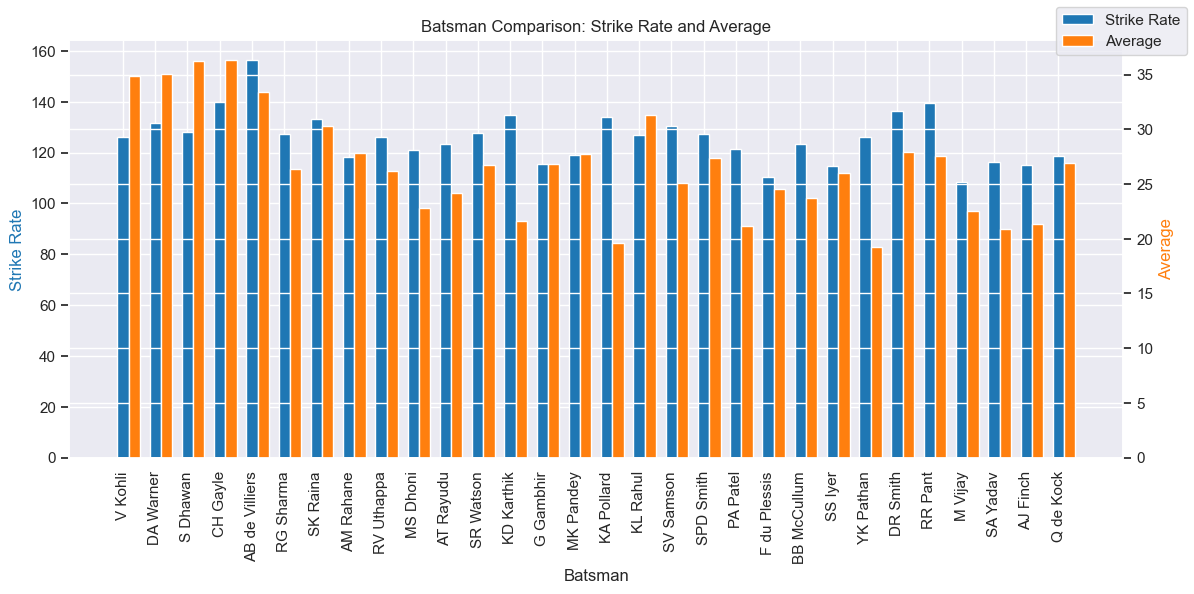

In [367]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'total_runs_by_batsman' is your DataFrame with columns 'Batsman', 'Strike Rate', and 'Average'

# Extract the data
batsmen = total_runs_by_batsman['Batsman']
strike_rate = total_runs_by_batsman['Mean Strike Rate']
average = total_runs_by_batsman['Mean Average']

# Create positions for the bars
x = np.arange(len(batsmen))

# Define the width of the bars
bar_width = 0.35

# Create a figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bars for 'Strike Rate' on the primary y-axis (left)
ax1.bar(x, strike_rate, width=bar_width, label='Strike Rate', color='tab:blue')

# Set the x-tick labels to be the batsmen's names
ax1.set_xticks(x)
ax1.set_xticklabels(batsmen, rotation=90)
ax1.set_xlabel('Batsman')
ax1.set_ylabel('Strike Rate', color='tab:blue')

# Create a second y-axis (right) for 'Average'
ax2 = ax1.twinx()
ax2.bar(x + bar_width, average, width=bar_width, label='Average', color='tab:orange')
ax2.set_ylabel('Average', color='tab:orange')

# Set the title and legend
plt.title('Batsman Comparison: Strike Rate and Average')
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()


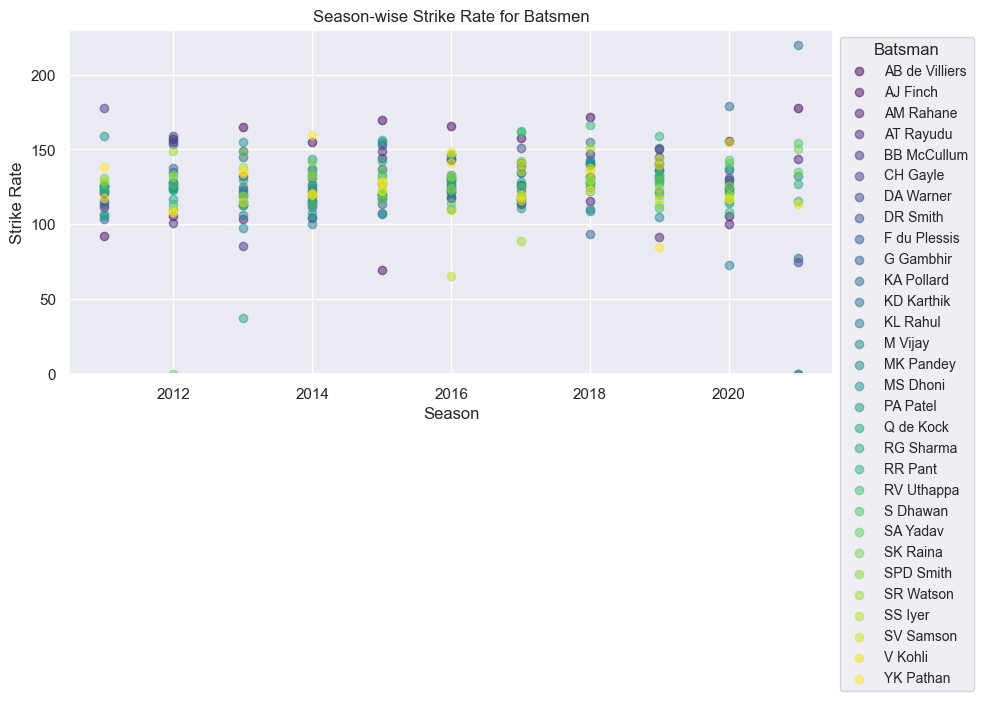

In [368]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have a 'merged_df' dataframe with 'season', 'strike_rate', 'batsman' columns

# Extract the data for the scatter plot
seasons = merged_df['season']
strike_rates = merged_df['strike_rate']
batsmen = merged_df['Batsman']

# Create a list of unique batsmen and assign a unique color to each
unique_batsmen = batsmen.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_batsmen)))

# Create a scatter plot with different colors for each batsman
plt.figure(figsize=(10, 6))
for i, batsman in enumerate(unique_batsmen):
    mask = batsmen == batsman
    plt.scatter(seasons[mask], strike_rates[mask], marker='o', label=batsman, color=colors[i], alpha=0.5)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Strike Rate')
plt.title('Season-wise Strike Rate for Batsmen')

# Set y-axis limits to the desired range (0 to 230)
plt.ylim(0, 230)

# Create a legend
plt.legend(title='Batsman', fontsize='small', title_fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


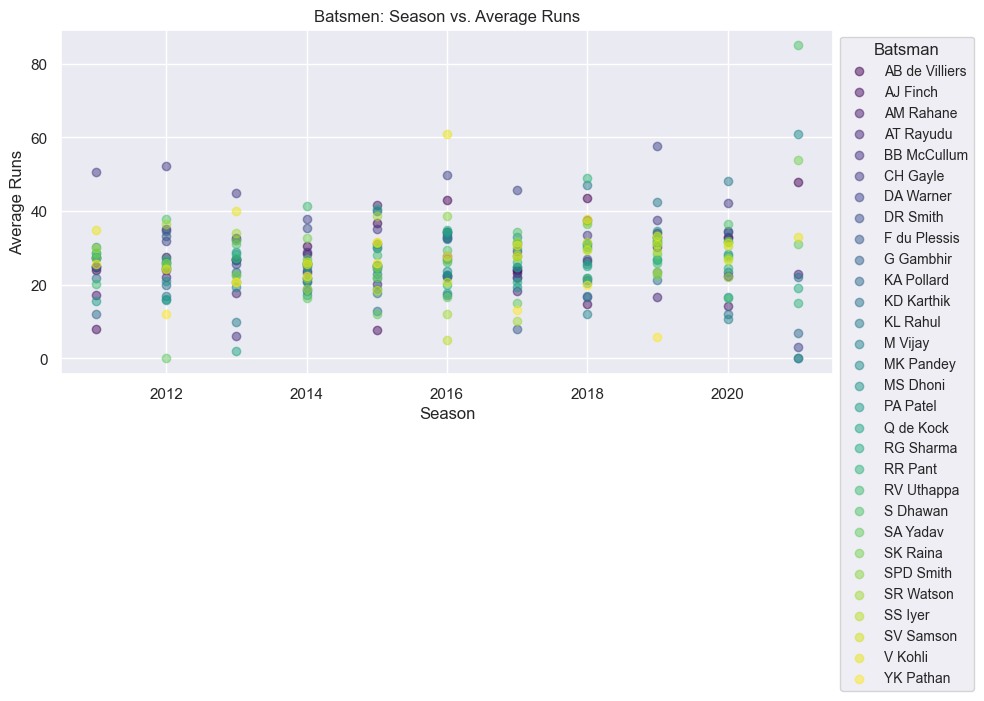

In [369]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have a 'merged_df' dataframe with 'season', 'average_runs', and 'batsman' columns

# Extract the data for the scatter plot
seasons = merged_df['season']
average_runs = merged_df['average']
batsmen = merged_df['Batsman']

# Create a list of unique batsmen and assign a unique color to each
unique_batsmen = batsmen.unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_batsmen)))

# Create a scatter plot with different colors for each batsman
plt.figure(figsize=(10, 6))
for i, batsman in enumerate(unique_batsmen):
    mask = batsmen == batsman
    plt.scatter(
        seasons[mask],
        average_runs[mask],
        marker='o',
        label=batsman,
        color=colors[i],
        alpha=0.5
    )

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.title('Batsmen: Season vs. Average Runs')

# Create a legend
plt.legend(title='Batsman', fontsize='small', title_fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [370]:
# Group the data by 'Bowler' and 'Season' and aggregate the sum of runs and count of balls
bowler_stats = data.groupby(['bowler', 'season'])[['runs_off_bat', 'ball']].agg({'runs_off_bat': 'sum', 'ball': 'count'}).reset_index()
bowler_stats = bowler_stats.rename(columns={'runs_off_bat': 'Total Runs Given', 'ball': 'Total Balls bowled'})
bowler_stats['Total Balls bowled']=bowler_stats['Total Balls bowled']/6
bowler_stats['Total Balls bowled']=bowler_stats['Total Balls bowled'].astype(int)

# Calculate the economy by dividing 'Total Runs' by 'Total Balls Faced'
bowler_stats['Economy'] = bowler_stats['Total Runs Given'] / bowler_stats['Total Balls bowled']


# Filter the rows where 'Season' is greater than 2011
bowler_stats = bowler_stats[bowler_stats['season'] > 2011]

bowler_stats



bowler  season  Total Runs Given  Total Balls bowled    Economy
0     A Ashish Reddy    2012               229                  28   8.178571
1     A Ashish Reddy    2013                69                   6  11.500000
2     A Ashish Reddy    2015                49                   6   8.166667
3     A Ashish Reddy    2016                39                   3  13.000000
4         A Chandila    2012                86                  14   6.142857
...              ...     ...               ...                 ...        ...
1470          Z Khan    2013                45                   6   7.500000
1471          Z Khan    2014               142                  23   6.173913
1472          Z Khan    2015               145                  25   5.800000
1473          Z Khan    2016               324                  45   7.200000
1474          Z Khan    2017               308                  41   7.512195

[1008 rows x 5 columns]

In [371]:
# Group the 'bowler_stats' DataFrame by 'Bowler' and aggregate the sum of 'Total Runs' and 'Total Balls Faced'
bowler_summary = bowler_stats.groupby('bowler')[['Total Runs Given', 'Total Balls bowled']].sum()

# Calculate the 'Economy' column by dividing 'Total Runs' by 'Total Balls Faced'
bowler_summary['Economy'] = bowler_summary['Total Runs Given'] / bowler_summary['Total Balls bowled']

# Reset the index to make 'Bowler' a column rather than an index
bowler_summary = bowler_summary.reset_index()

# Display the new DataFrame
bowler_summary


bowler  Total Runs Given  Total Balls bowled    Economy
0     A Ashish Reddy               386                  43   8.976744
1         A Chandila               242                  39   6.205128
2        A Choudhary               137                  18   7.611111
3        A Dananjaya                46                   4  11.500000
4           A Mishra              2690                 365   7.369863
..               ...               ...                 ...        ...
317  Y Venugopal Rao                42                   4  10.500000
318        YK Pathan               446                  55   8.109091
319        YS Chahal              2690                 367   7.329700
320     Yuvraj Singh               500                  64   7.812500
321           Z Khan              1406                 201   6.995025

[322 rows x 4 columns]

In [372]:
# Sort the 'bowler_summary' DataFrame by 'Economy' in descending order
bowler_summary = bowler_summary.sort_values(by='Economy', ascending=True)

# Keep the top 30 rows
top_30_bowlers = bowler_summary.head(30)
# Reset the index and drop the old index column
top_30_bowlers = top_30_bowlers.reset_index(drop=True)

top_30_bowlers


bowler  Total Runs Given  Total Balls bowled   Economy
0           NB Singh                14                   4  3.500000
1             AS Roy                 8                   2  4.000000
2           RV Gomez                 5                   1  5.000000
3           JDP Oram                20                   4  5.000000
4            SW Tait               210                  37  5.675676
5           M Jansen                24                   4  6.000000
6          MJ Clarke                67                  11  6.090909
7        Rashid Khan              1544                 252  6.126984
8   RE van der Merwe               129                  21  6.142857
9         A Chandila               242                  39  6.205128
10       JW Hastings                63                  10  6.300000
11      JR Hazlewood                63                  10  6.300000
12   AA Jhunjhunwala                38                   6  6.333333
13         DJM Short                19                   3  6.333333
14       AB McDonald                77                  12  6.416667
15   KMDN Kulasekara                90                  14  6.428571
16   SMSM Senanayake               206                  32  6.437500
17    AD Mascarenhas               129                  20  6.450000
18        MJ Santner               136                  21  6.476190
19           J Yadav               285                  44  6.477273
20          MA Starc               656                 101  6.495050
21         R Rampaul               299                  46  6.500000
22        BAW Mendis                78                  12  6.500000
23       KA Jamieson                26                   4  6.500000
24         GH Vihari                46                   7  6.571429
25        SK Trivedi               758                 115  6.591304
26          VS Malik                86                  13  6.615385
27     Mohammad Nabi               351                  53  6.622642
28         SP Narine              3097                 467  6.631692
29         RJ Harris               199                  30  6.633333

In [373]:


# Assuming 'top_30_bowlers' and 'bowler_stats' are your dataframes

# First, let's extract the unique bowler names from 'top_30_bowlers'
unique_bowler_names = top_30_bowlers['bowler'].unique()

# Now, update 'bowler_stats' based on these unique bowler names
bowler_stats = bowler_stats[bowler_stats['bowler'].isin(unique_bowler_names)]

# This will filter 'bowler_stats' to only include rows where the bowler's name is in 'top_30_bowlers'.
# All other rows will be dropped from 'bowler_stats'.
bowler_stats

bowler  season  Total Runs Given  Total Balls bowled   Economy
4          A Chandila    2012                86                  14  6.142857
5          A Chandila    2013               156                  25  6.240000
58    AA Jhunjhunwala    2012                38                   6  6.333333
80        AB McDonald    2012                60                  10  6.000000
81        AB McDonald    2013                17                   2  8.500000
...               ...     ...               ...                 ...       ...
1249        SP Narine    2020               300                  38  7.894737
1281          SW Tait    2012               126                  26  4.846154
1282          SW Tait    2013                84                  11  7.636364
1399         VS Malik    2013                58                  10  5.800000
1400         VS Malik    2014                28                   3  9.333333

[63 rows x 5 columns]

In [374]:
new_bowlers_df

bowler  season  Total wickets
0     A Ashish Reddy    2012             11
1     A Ashish Reddy    2013              5
2     A Ashish Reddy    2015              4
3     A Ashish Reddy    2016              1
4         A Chandila    2012              7
...              ...     ...            ...
1470          Z Khan    2013              6
1471          Z Khan    2014              7
1472          Z Khan    2015              8
1473          Z Khan    2016             13
1474          Z Khan    2017             14

[1142 rows x 3 columns]

In [375]:

bowler_stats = bowler_stats.merge(new_bowlers_df, on=['bowler', 'season'], how='left')

# The 'how' parameter is set to 'left' to keep all rows from 'bowler_stats' and only add matching rows from 'new_bowlers_df'.
# If a match is not found in 'new_bowlers_df', the corresponding columns will have NaN values in the merged dataframe.

# Now, 'bowler_stats' contains the merged data.
bowler_stats

bowler  season  Total Runs Given  Total Balls bowled   Economy  \
0        A Chandila    2012                86                  14  6.142857   
1        A Chandila    2013               156                  25  6.240000   
2   AA Jhunjhunwala    2012                38                   6  6.333333   
3       AB McDonald    2012                60                  10  6.000000   
4       AB McDonald    2013                17                   2  8.500000   
..              ...     ...               ...                 ...       ...   
58        SP Narine    2020               300                  38  7.894737   
59          SW Tait    2012               126                  26  4.846154   
60          SW Tait    2013                84                  11  7.636364   
61         VS Malik    2013                58                  10  5.800000   
62         VS Malik    2014                28                   3  9.333333   

    Total wickets  
0               7  
1              12  
2               1  
3               5  
4               1  
..            ...  
58              7  
59             10  
60              1  
61              2  
62              1  

[63 rows x 6 columns]

In [376]:
bowlers_total_wickets

bowler  Total wickets
82        DJ Bravo            176
301     SL Malinga            164
307      SP Narine            164
47         B Kumar            161
242       R Ashwin            155
..             ...            ...
164  KS Williamson              0
189        M Vijay              0
98    F du Plessis              0
231   P Ray Barman              0
68         CJ Dala              0

[353 rows x 2 columns]

In [377]:
top_30_bowlers

bowler  Total Runs Given  Total Balls bowled   Economy
0           NB Singh                14                   4  3.500000
1             AS Roy                 8                   2  4.000000
2           RV Gomez                 5                   1  5.000000
3           JDP Oram                20                   4  5.000000
4            SW Tait               210                  37  5.675676
5           M Jansen                24                   4  6.000000
6          MJ Clarke                67                  11  6.090909
7        Rashid Khan              1544                 252  6.126984
8   RE van der Merwe               129                  21  6.142857
9         A Chandila               242                  39  6.205128
10       JW Hastings                63                  10  6.300000
11      JR Hazlewood                63                  10  6.300000
12   AA Jhunjhunwala                38                   6  6.333333
13         DJM Short                19                   3  6.333333
14       AB McDonald                77                  12  6.416667
15   KMDN Kulasekara                90                  14  6.428571
16   SMSM Senanayake               206                  32  6.437500
17    AD Mascarenhas               129                  20  6.450000
18        MJ Santner               136                  21  6.476190
19           J Yadav               285                  44  6.477273
20          MA Starc               656                 101  6.495050
21         R Rampaul               299                  46  6.500000
22        BAW Mendis                78                  12  6.500000
23       KA Jamieson                26                   4  6.500000
24         GH Vihari                46                   7  6.571429
25        SK Trivedi               758                 115  6.591304
26          VS Malik                86                  13  6.615385
27     Mohammad Nabi               351                  53  6.622642
28         SP Narine              3097                 467  6.631692
29         RJ Harris               199                  30  6.633333

In [378]:


top_30_bowlers = top_30_bowlers.merge(bowlers_total_wickets, on='bowler', how='inner')

# The 'how' parameter is set to 'inner' to keep only the rows with matching bowler names.

# Now, 'top_30_bowlers' contains the merged data.
top_30_bowlers

bowler  Total Runs Given  Total Balls bowled   Economy  \
0           NB Singh                14                   4  3.500000   
1             AS Roy                 8                   2  4.000000   
2           RV Gomez                 5                   1  5.000000   
3           JDP Oram                20                   4  5.000000   
4            SW Tait               210                  37  5.675676   
5           M Jansen                24                   4  6.000000   
6          MJ Clarke                67                  11  6.090909   
7        Rashid Khan              1544                 252  6.126984   
8   RE van der Merwe               129                  21  6.142857   
9         A Chandila               242                  39  6.205128   
10       JW Hastings                63                  10  6.300000   
11      JR Hazlewood                63                  10  6.300000   
12   AA Jhunjhunwala                38                   6  6.333333   
13         DJM Short                19                   3  6.333333   
14       AB McDonald                77                  12  6.416667   
15   KMDN Kulasekara                90                  14  6.428571   
16   SMSM Senanayake               206                  32  6.437500   
17    AD Mascarenhas               129                  20  6.450000   
18        MJ Santner               136                  21  6.476190   
19           J Yadav               285                  44  6.477273   
20          MA Starc               656                 101  6.495050   
21         R Rampaul               299                  46  6.500000   
22        BAW Mendis                78                  12  6.500000   
23       KA Jamieson                26                   4  6.500000   
24         GH Vihari                46                   7  6.571429   
25        SK Trivedi               758                 115  6.591304   
26          VS Malik                86                  13  6.615385   
27     Mohammad Nabi               351                  53  6.622642   
28         SP Narine              3097                 467  6.631692   
29         RJ Harris               199                  30  6.633333   

    Total wickets  
0               1  
1               1  
2               6  
3               1  
4              16  
5               4  
6               4  
7              87  
8              16  
9              19  
10              3  
11              1  
12              1  
13              1  
14              6  
15              9  
16              9  
17              9  
18              6  
19              8  
20             41  
21             18  
22              2  
23              1  
24              1  
25             44  
26              3  
27             10  
28            164  
29             27

In [379]:
seasons_played = bowler_stats.groupby('bowler')['season'].nunique().reset_index()
seasons_played.rename(columns={'season': 'Total seasons played'}, inplace=True)

# Merge the 'unique_seasons' column with 'top_30_bowlers' based on 'bowler' column
top_30_bowlers = top_30_bowlers.merge(seasons_played, on='bowler', how='left')
top_30_bowlers


bowler  Total Runs Given  Total Balls bowled   Economy  \
0           NB Singh                14                   4  3.500000   
1             AS Roy                 8                   2  4.000000   
2           RV Gomez                 5                   1  5.000000   
3           JDP Oram                20                   4  5.000000   
4            SW Tait               210                  37  5.675676   
5           M Jansen                24                   4  6.000000   
6          MJ Clarke                67                  11  6.090909   
7        Rashid Khan              1544                 252  6.126984   
8   RE van der Merwe               129                  21  6.142857   
9         A Chandila               242                  39  6.205128   
10       JW Hastings                63                  10  6.300000   
11      JR Hazlewood                63                  10  6.300000   
12   AA Jhunjhunwala                38                   6  6.333333   
13         DJM Short                19                   3  6.333333   
14       AB McDonald                77                  12  6.416667   
15   KMDN Kulasekara                90                  14  6.428571   
16   SMSM Senanayake               206                  32  6.437500   
17    AD Mascarenhas               129                  20  6.450000   
18        MJ Santner               136                  21  6.476190   
19           J Yadav               285                  44  6.477273   
20          MA Starc               656                 101  6.495050   
21         R Rampaul               299                  46  6.500000   
22        BAW Mendis                78                  12  6.500000   
23       KA Jamieson                26                   4  6.500000   
24         GH Vihari                46                   7  6.571429   
25        SK Trivedi               758                 115  6.591304   
26          VS Malik                86                  13  6.615385   
27     Mohammad Nabi               351                  53  6.622642   
28         SP Narine              3097                 467  6.631692   
29         RJ Harris               199                  30  6.633333   

    Total wickets  Total seasons played  
0               1                     1  
1               1                     1  
2               6                     1  
3               1                     1  
4              16                     2  
5               4                     1  
6               4                     1  
7              87                     5  
8              16                     2  
9              19                     2  
10              3                     2  
11              1                     1  
12              1                     1  
13              1                     1  
14              6                     2  
15              9                     1  
16              9                     1  
17              9                     2  
18              6                     2  
19              8                     5  
20             41                     2  
21             18                     2  
22              2                     1  
23              1                     1  
24              1                     2  
25             44                     2  
26              3                     2  
27             10                     5  
28            164                     9  
29             27                     2

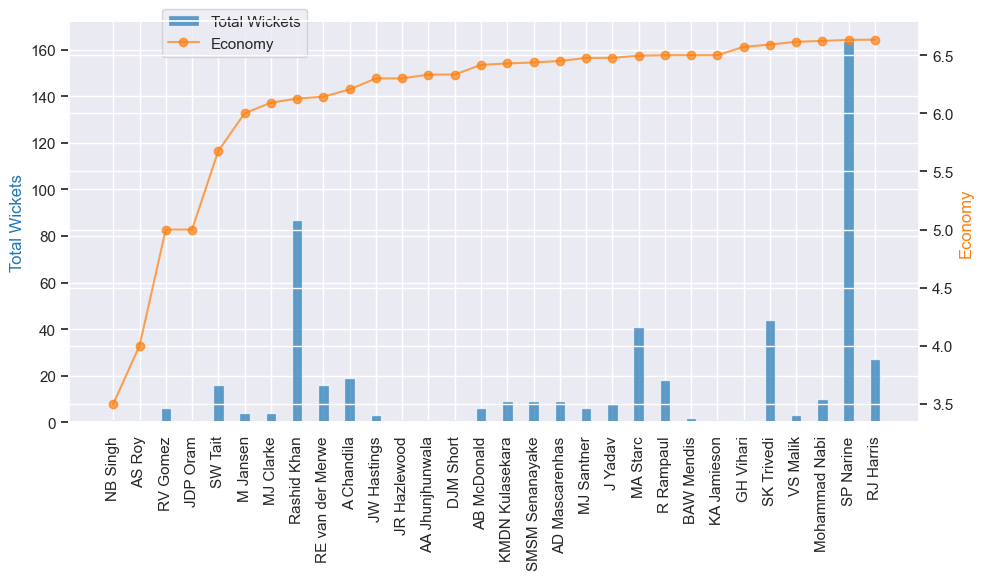

In [400]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'top_30_bowlers' dataframe with 'bowler', 'total wickets', and 'economy' columns

# Create an array of indices for the x-axis
x = np.arange(len(top_30_bowlers))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'Total Wickets' on the left y-axis
ax.bar(x, top_30_bowlers['Total wickets'], width=0.4, label='Total Wickets', color='tab:blue', alpha=0.7)

# Create a twin y-axis for 'Economy'
ax2 = ax.twinx()

# Plot 'Economy' on the right y-axis
ax2.plot(x, top_30_bowlers['Economy'], marker='o', color='tab:orange', label='Economy', alpha=0.7)

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(top_30_bowlers['bowler'], rotation=90)

# Set y-axis labels
ax.set_ylabel('Total Wickets', color='tab:blue')
ax2.set_ylabel('Economy', color='tab:orange')

# Add legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.1, 1.05))

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\tanishq bhardwaj\AppData\Local\Temp\ipykernel_19696\3444346586.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(pivot_df.columns))


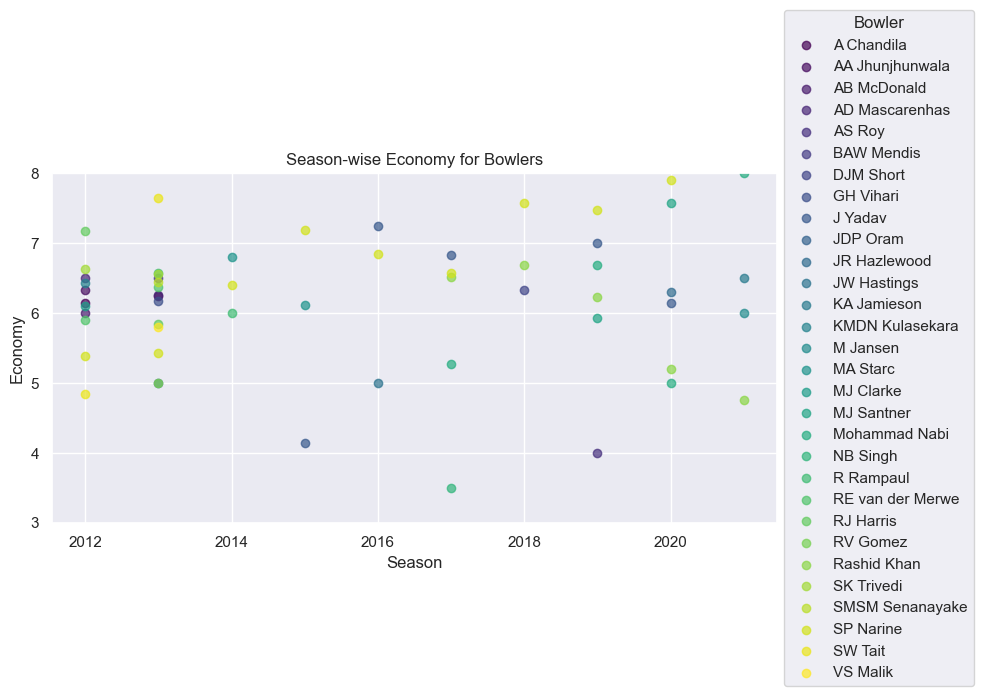

In [381]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have a 'bowler_stats' dataframe with columns 'bowler', 'season', and season-wise 'economy' data

# Pivot the dataframe to have 'season' as the index and 'bowler' as the columns
pivot_df = bowler_stats.pivot(index='season', columns='bowler', values='Economy')

# Create a scatter plot with different colors for each bowler
fig, ax = plt.subplots(figsize=(10, 6))

# Define a colormap for bowlers
colormap = plt.cm.get_cmap('viridis', len(pivot_df.columns))

# Extract the data for the scatter plot
seasons = pivot_df.index
bowlers = pivot_df.columns

# Plot data for each bowler with a unique color
for i, bowler in enumerate(bowlers):
    economy_values = pivot_df[bowler].values
    color = colormap(i / len(bowlers))  # Assign a unique color based on position in the list of bowlers
    ax.scatter(seasons, economy_values, marker='o', label=bowler, color=color, alpha=0.7)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Economy')
plt.title('Season-wise Economy for Bowlers')

# Set y-axis limits to your desired range (e.g., 3 to 8)
ax.set_ylim(3, 8)

# Create a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Bowler')

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


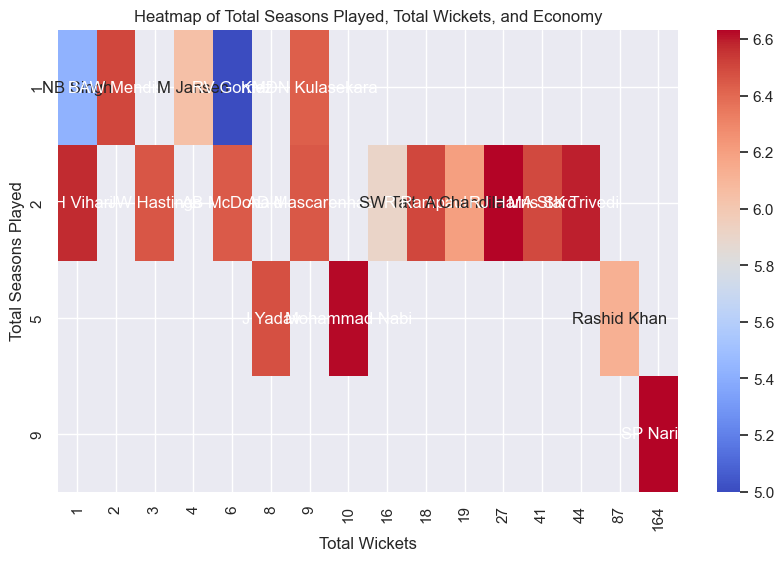

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a 'top_30_bowlers' dataframe with columns 'bowler', 'total seasons played', 'total wickets', and 'economy'.

# Pivot the dataframe to create a matrix for the heatmap
heatmap_data = top_30_bowlers.pivot_table(index='Total seasons played', columns='Total wickets', values='Economy')

# Create an annotation dataframe with 'bowler' names in the same shape as 'heatmap_data'
annot_data = top_30_bowlers.pivot_table(index='Total seasons played', columns='Total wickets', values='bowler', aggfunc='first')

# Create a heatmap and use the annotation dataframe for annotating the cells
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_data, annot=annot_data, fmt='', cmap='coolwarm', cbar=True)

# Set axis labels and title
plt.xlabel('Total Wickets')
plt.ylabel('Total Seasons Played')
plt.title('Heatmap of Total Seasons Played, Total Wickets, and Economy')

# Rotate the x-axis labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


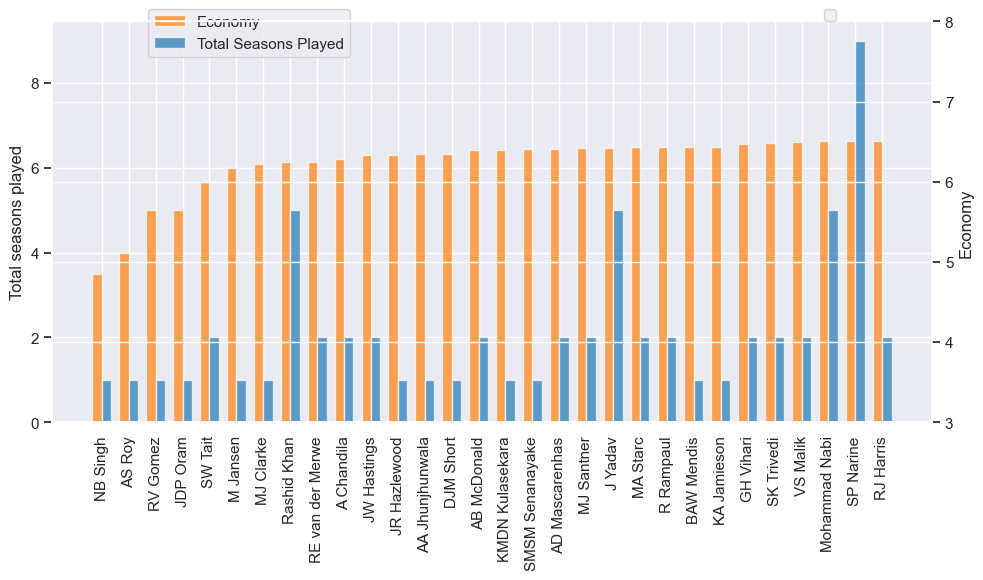

In [397]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a 'top_30_bowlers' dataframe with 'bowler', 'total seasons played', and 'economy' columns

# Create an array of indices for the x-axis
x = np.arange(len(top_30_bowlers))

# Set the width of the bars
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'Economy' on the left y-axis
ax.bar(x - bar_width/2, top_30_bowlers['Economy'], bar_width, label='Economy', color='tab:orange', alpha=0.7)

# Plot 'Total Seasons Played' on the right y-axis
ax.bar(x + bar_width/2, top_30_bowlers['Total seasons played'], bar_width, label='Total Seasons Played', color='tab:blue', alpha=0.7)

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(top_30_bowlers['bowler'], rotation=90)

# Set y-axis labels
ax.set_ylabel('Total seasons played')


# Create a twin y-axis for 'Economy'
ax2 = ax.twinx()
ax2.set_ylabel('Economy')
# Set y-axis limits for 'Economy' (3 to 8)
ax2.set_ylim(3, 8)


# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1.05))
ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1.05))

# Show the plot
plt.tight_layout()
plt.show()
